<a href="https://colab.research.google.com/github/Hyun-ho-Lee/Kaggle-and-Project/blob/master/%EB%B9%85%EC%BD%98EDA_ing_%2Btarget_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2021 빅콘테스트 데이터분석분야 수산 Biz 부문 

1. 가격 예측시, 수입용도, 수입형태 등 제공데이터와 동일하게 세분화하여 제출하여야 하나요? 

 - 상세 어종별 평균단가를 예측하시면 됩니다.



2. 각 용어의 의미는?

 - 수출국 : 원료를 수입하여 가공 후 반제품 또는 최종제품형태로 제조하여 수출하는 국가 

 - 제조국 : 원료를 생산 또는 생산·가공하는 국가

  (예시)

  ① 명태포(필렛)의 경우, 원료의 제조국(원산지)은 러시아지만, 필렛으로 가공하여 한국으로 수출 시 수출국은 중국입니다. 

      이 경우, 제조국(원산지) – 러시아, 수출국 – 중국입니다. 

  ② 러시아산 명태를 중국에서 단순 명태포(필렛)으로 가공하고, 반제품 형태로 일본으로 수출, 일본에서 최종제품 형태로 제조 후 수 한국으로 수출한 경우, 수출국은 일본으로 표시됩니다.

      이 경우, 제조국(원산지) – 러시아, 수출국 – 일본입니다.

      단순히 원료형태로 수입하는 경우, “제조국(원산지) = 수출국”입니다. 

  ③ 러시아에서 명태를 원료를 수입한 경우, 제조국(원산지), 수출국 모두 러시아입니다.

 - 수입용도_반송품 : 국내 통관이 되지 않고 제3국으로 수출될 경우(중계무역)로 대부분 수입가격은 기재되지 않지만 제3국 거래당사자가 가격표시를 요청할 경우 가격을 표시함

 - 수입용도_자사제품제조용 : 제조공장이 직접 수입한 경우로, 수입한 수산물을 통관 후 유통·판매하는 것이 아니라 자사의 제품원료로 사용할 목적으로 수입하였을 때 자사제품제조용으로 분류

    (예시) 골뱅이의 경우, 제조사 통조림 제품의 원료로 사용할 목적(자사제품제조용)으로 수입하였으며, 원료의 형태로 재판매하지 않음

 - 수입용도_외화획득용 원료 : 외화획득을 목적으로 생산에 필요한 원료로 수출을 목적으로 제품을 생산하기 위해 수입한 원료를 뜻함

    (예시) 스페인산 다랑어를 수입하여, 한국에서 스테이크용으로 절단 가공한 후 다시 EU로 수출하는 경우, 스페인산 다랑어는 외화획득용 원료임



3. 평균단가의 단위 및 기준은?

 - 미국달러($)/kg 입니다.

 - 데이터는 대한민국이 기준으로, 제조국 또는 수출국의 판매자가 대한민국의 수입자에게 파는 가격을 기준으로 합니다. 

 

4. 결과 제출용 모형 구축시 예측값과 무관한 상세어종, 카테고리 등 변수를 고려하여야 하나요?

 - 평가는 데이터와 도메인의 이해, 분석 전 과정에 대하여 평가에 포함되오니 변수 선택, 세부 모형 구축 방법 등은 참가자의 판단하에 결과물에포함하여 제출하여 주시면 됩니다.

# 1. 필요 패키지 정의

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


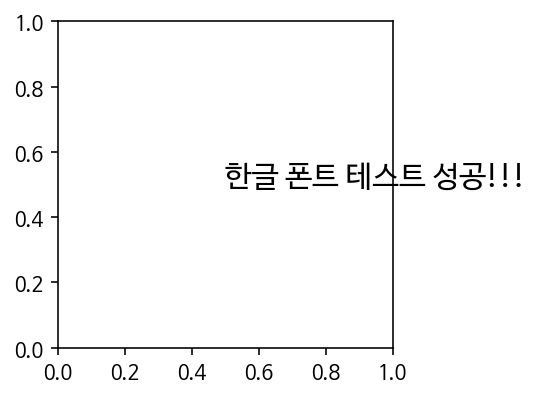

In [1]:
# 그래프 한글폰트 사용설정 in Colab - 한번 실행 후 폰트가 깨진다면 런타임 다시시작 후 한번 더 실행

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

fontpath = '("/content/drvie/MyDrive/NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

## Test
plt.figure(figsize=(3,3))
plt.text(0.5, 0.5, '한글 폰트 테스트 성공!!!', size=15)
plt.show()

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
plt.style.use("ggplot")
warnings.filterwarnings('ignore')
import os 
from google.colab import drive
drive.mount('/content/drvie')
train_data= pd.read_excel("/content/drvie/MyDrive/bigcon1.xlsx")

Mounted at /content/drvie


# 2.Data Check

In [3]:
train_data.shape

(42073, 10)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42073 entries, 0 to 42072
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   REG_DATE       42073 non-null  datetime64[ns]
 1   P_TYPE         42073 non-null  object        
 2   CTRY_1         42073 non-null  object        
 3   CTRY_2         42073 non-null  object        
 4   P_PURPOSE      42073 non-null  object        
 5   CATEGORY_1     42073 non-null  object        
 6   CATEGORY_2     42073 non-null  object        
 7   P_NAME         42073 non-null  object        
 8   P_IMPORT_TYPE  42073 non-null  object        
 9   P_PRICE        42073 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 3.2+ MB


In [5]:
train_data.head(5)

,REG_DATE,P_TYPE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE
0,2015-12-28,수산물,아르헨티나,아르헨티나,판매용,갑각류,새우,아르헨티나붉은새우,냉동,7.480000
1,2015-12-28,수산물,바레인,바레인,판매용,갑각류,게,꽃게,냉동,2.920000
2,2015-12-28,수산물,바레인,바레인,판매용,갑각류,게,꽃게,"냉동,절단",3.356352
3,2015-12-28,수산물,칠레,칠레,판매용,패류 멍게류,해삼,해삼,"건조,자숙",18.260870
4,2015-12-28,수산물,중국,중국,판매용,어류,서대 박대 페루다,서대,냉동,4.791340


In [6]:
train_data.tail(5)

,REG_DATE,P_TYPE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE
42068,2019-12-30,수산물,러시아,러시아,판매용,갑각류,게,왕게,활,38.437099
42069,2019-12-30,수산물,중국,중국,판매용,연체류 해물모듬,낙지,낙지,활,8.282274
42070,2019-12-30,수산물,러시아,러시아,판매용,갑각류,게,대게,활,23.396192
42071,2019-12-30,수산물,중국,중국,판매용,패류 멍게류,바지락,바지락,활,0.852967
42072,2019-12-30,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,냉장,13.205675


In [7]:
train_data.describe()

,P_PRICE
count,42073.000000
mean,9.545346
std,21.914624
min,0.203770
25%,2.654165
50%,5.165478
75%,9.929108
max,1522.038402


In [8]:
train_data['P_TYPE'].value_counts()

수산물    42073
Name: P_TYPE, dtype: int64

In [9]:
train_data=train_data.drop('P_TYPE',axis=1)
y=train_data['P_PRICE']

In [10]:
objects=train_data.select_dtypes(include=['object'])
objects.columns

Index(['CTRY_1', 'CTRY_2', 'P_PURPOSE', 'CATEGORY_1', 'CATEGORY_2', 'P_NAME',
       'P_IMPORT_TYPE'],
      dtype='object')

In [11]:
train_data.isnull().sum()

REG_DATE         0
CTRY_1           0
CTRY_2           0
P_PURPOSE        0
CATEGORY_1       0
CATEGORY_2       0
P_NAME           0
P_IMPORT_TYPE    0
P_PRICE          0
dtype: int64

In [12]:
train_data[train_data['CTRY_1'] != train_data['CTRY_2'] ]

,REG_DATE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE
17,2015-12-28,프랑스,스페인,판매용,어류,참치 새치류,대서양참다랑어,냉장,28.868041
23,2015-12-28,대한민국,북한,판매용,젓갈류 해조류 해파리,미역,미역,염장,0.913119
39,2015-12-28,대만,벨리즈,판매용,어류,꽁치 학꽁치,꽁치,냉동,0.956387
40,2015-12-28,대만,일본,판매용,어류,참치 새치류,눈다랑어,"냉동,필렛(F),횟감",12.799577
41,2015-12-28,대만,일본,판매용,어류,참치 새치류,눈다랑어,"냉동,목살,횟감",3.628571
...,...,...,...,...,...,...,...,...,...
42006,2019-12-30,에콰도르,베네수엘라,외화획득용 원료,어류,갈치,갈치,냉동,1.774222
42009,2019-12-30,러시아,중국,판매용,어류,명태,명태,냉동,5.051081
42030,2019-12-30,러시아,중국,판매용,어류,가자미,각시가자미,냉동,2.263721
42040,2019-12-30,러시아,중국,판매용,어류,명태,명태,"냉동,필렛(F)",3.226426


# 3.EDA(~ing)

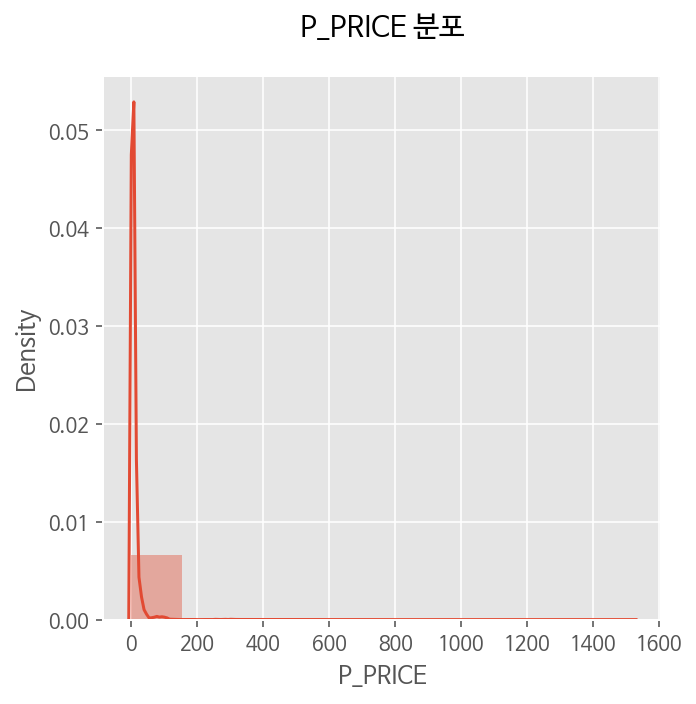

In [13]:
plt.figure(figsize=(5,5))
plt.title("P_PRICE 분포", pad= 20)
sns.distplot(train_data['P_PRICE'],bins=10)

In [14]:
CTRY1_MEAN = train_data.groupby('CTRY_1')['P_PRICE'].agg(**{'CTRY_1 mean price':'mean'}).reset_index()
CTRY1_MEAN=CTRY1_MEAN.sort_values(by=['CTRY_1 mean price'], axis=0,ascending=False)

In [15]:
CATEGORY_1_MEAN=train_data.groupby('CATEGORY_1')['P_PRICE'].agg(**{'Category 1 mean price':'mean'}).reset_index()
CATEGORY_1_MEAN=CATEGORY_1_MEAN.sort_values(by=['Category 1 mean price'], axis=0,ascending=False)

In [16]:
CATEGORY_2_MEAN=train_data.groupby('CATEGORY_2')['P_PRICE'].agg(**{'Category 2 mean price':'mean'}).reset_index()
CATEGORY_2_MEAN=CATEGORY_2_MEAN.sort_values(by=['Category 2 mean price'], axis=0,ascending=False)

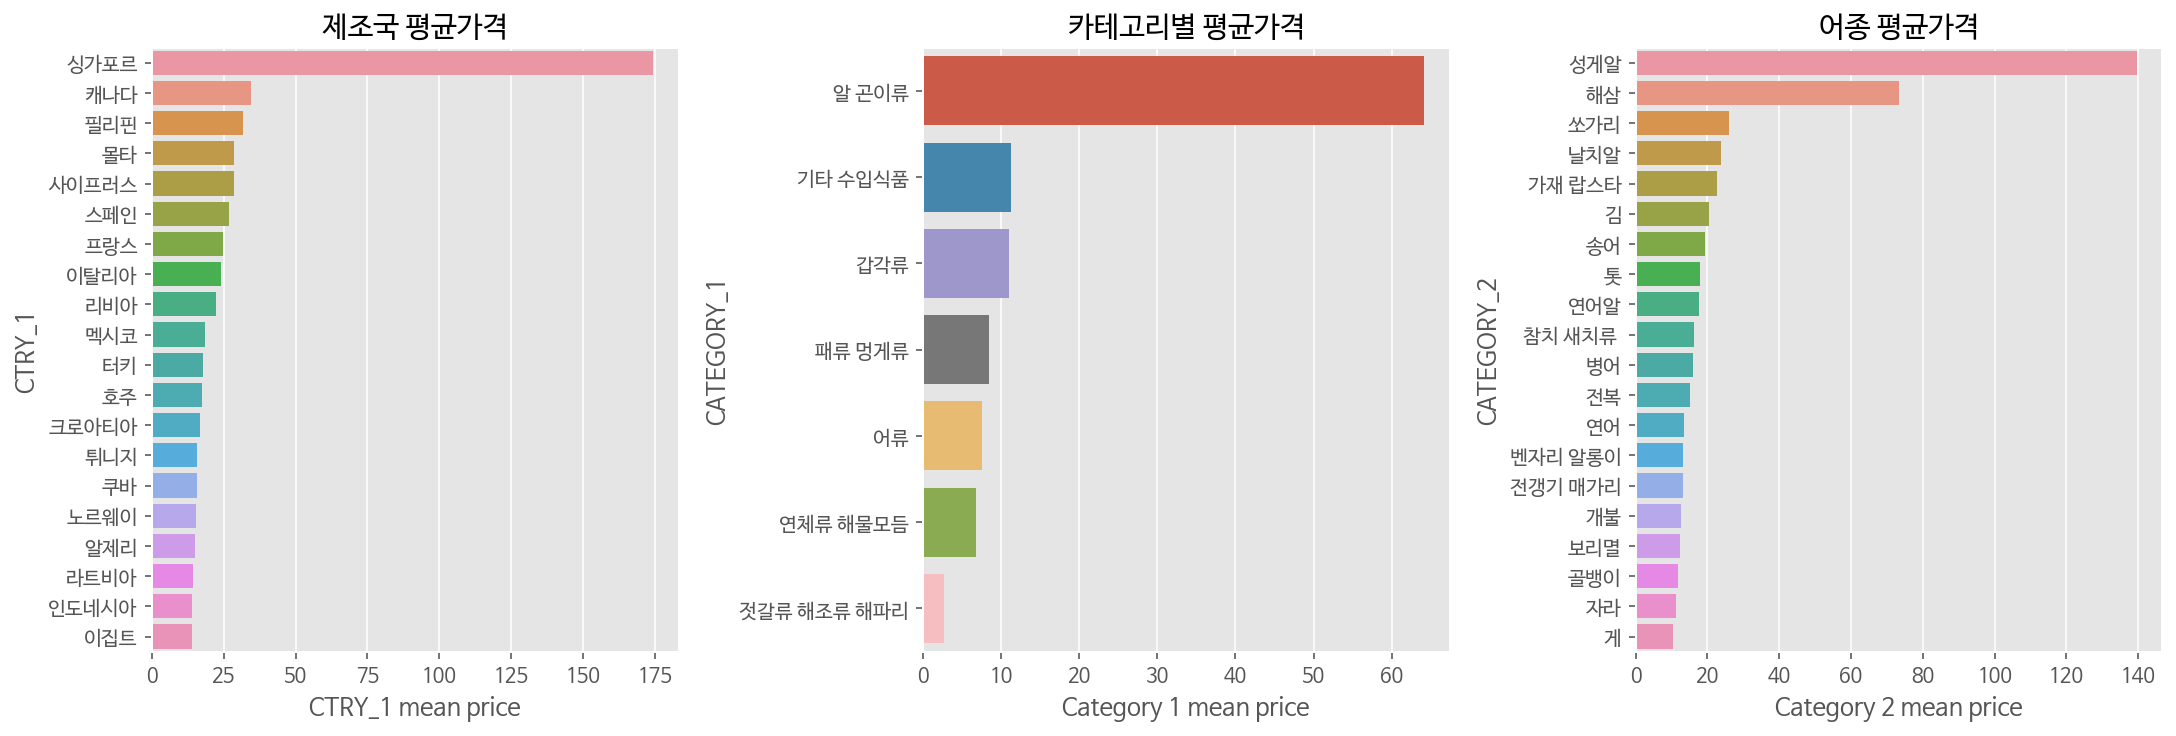

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(15,5), sharey=False,constrained_layout=True)
sns.barplot(data = CTRY1_MEAN[0:20], y='CTRY_1', x='CTRY_1 mean price',ax=axes[0])
axes[0].set_title("제조국 평균가격")
sns.barplot(data = CATEGORY_1_MEAN, y='CATEGORY_1', x='Category 1 mean price',ax=axes[1]) 
axes[1].set_title("카테고리별 평균가격")
sns.barplot(data = CATEGORY_2_MEAN[0:20], y='CATEGORY_2', x='Category 2 mean price',ax=axes[2])
axes[2].set_title("어종 평균가격")
plt.show()

In [18]:
x=train_data.groupby('CATEGORY_1')
x.count()

,REG_DATE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE
CATEGORY_1,,,,,,,,
갑각류,7298,7298,7298,7298,7298,7298,7298,7298
기타 수입식품,63,63,63,63,63,63,63,63
알 곤이류,1037,1037,1037,1037,1037,1037,1037,1037
어류,21339,21339,21339,21339,21339,21339,21339,21339
연체류 해물모듬,6772,6772,6772,6772,6772,6772,6772,6772
젓갈류 해조류 해파리,467,467,467,467,467,467,467,467
패류 멍게류,5097,5097,5097,5097,5097,5097,5097,5097


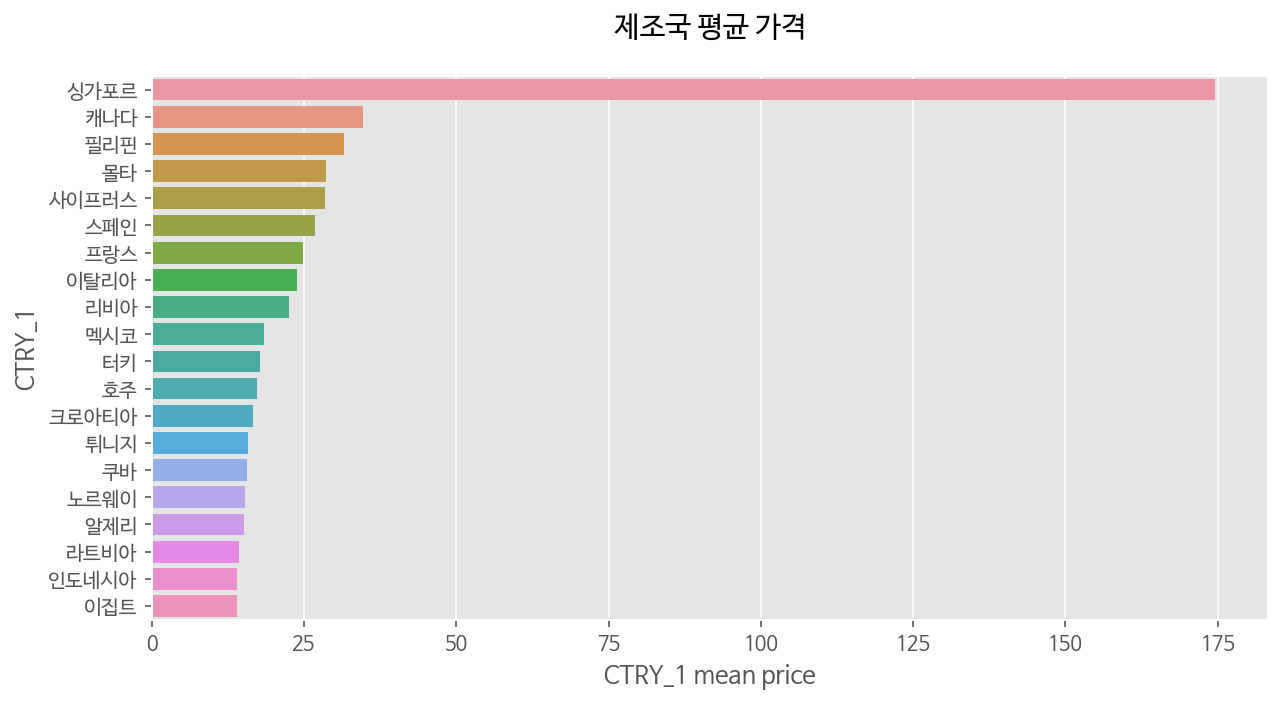

In [19]:
#CTRY_1 확인 결과 싱가포르가 제조국 평균 가격이 극단적으로 높음을 알수있음 값 확인은 위의 Value_counts() 코드 확인
plt.figure(figsize=(10,5))
plt.title('제조국 평균 가격', pad= 20)
sns.barplot(data = CTRY1_MEAN[0:20], y='CTRY_1', x='CTRY_1 mean price') 

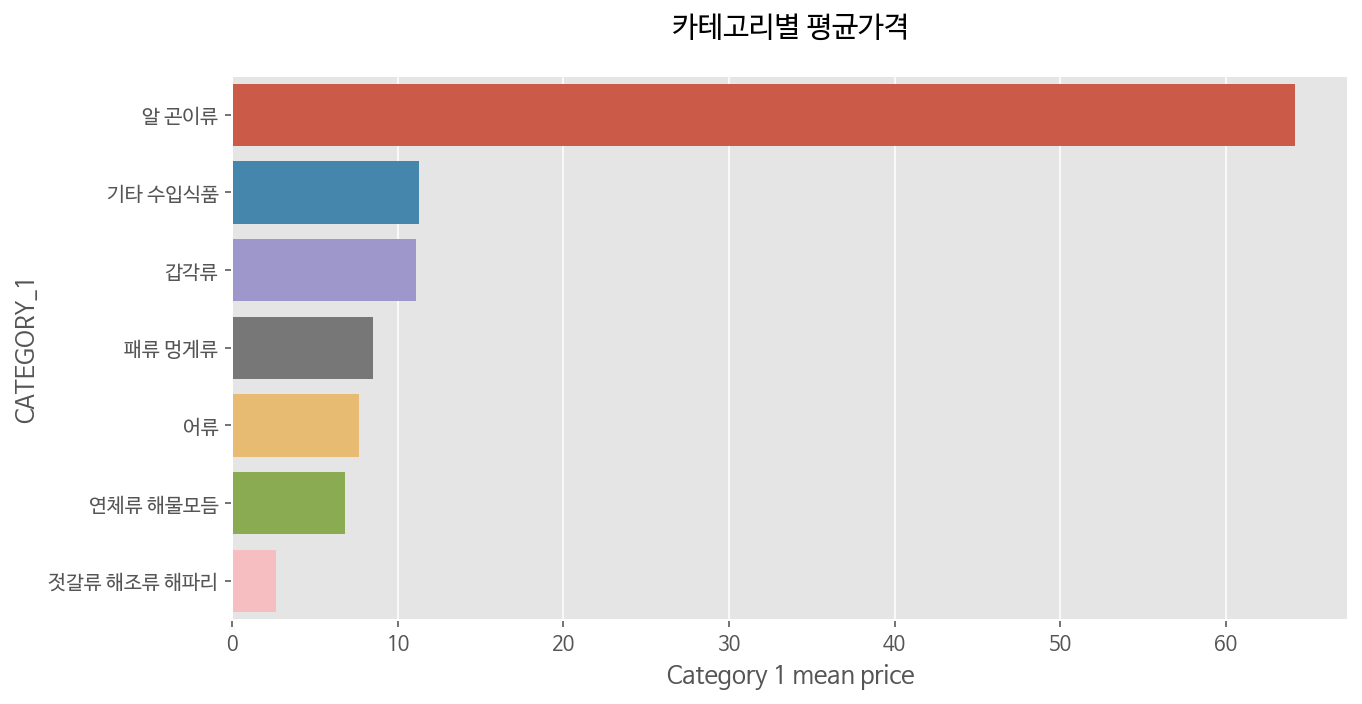

In [20]:
plt.figure(figsize=(10,5))
plt.xticks(rotation = 0)
plt.title('카테고리별 평균가격', pad= 20)
sns.barplot(data = CATEGORY_1_MEAN, y='CATEGORY_1', x='Category 1 mean price') 

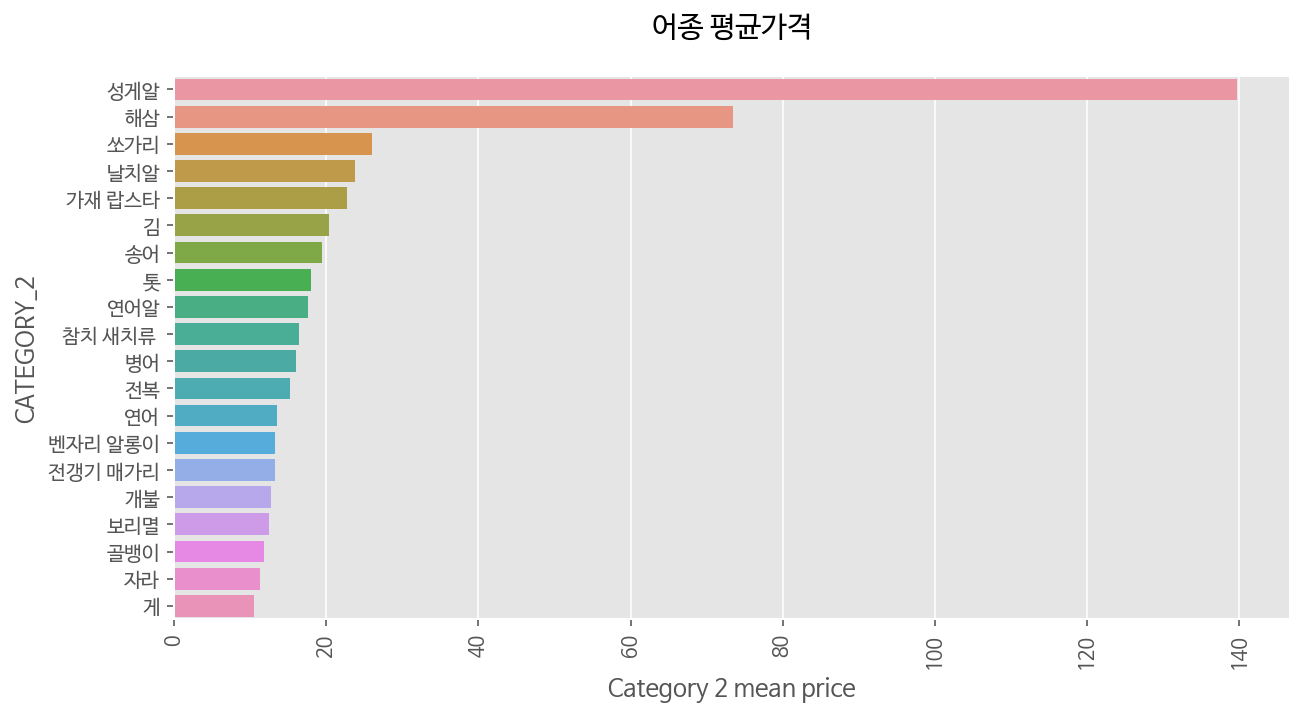

In [21]:
plt.figure(figsize=(10,5))
plt.xticks(rotation = 90)
plt.title('어종 평균가격', pad= 20)
sns.barplot(data = CATEGORY_2_MEAN[0:20], y='CATEGORY_2', x='Category 2 mean price')

In [22]:
range(len(objects.columns))

range(0, 7)

In [23]:
sortvalue=train_data['CTRY_1'].value_counts()
sortvalue

중국             11029
러시아             4031
베트남             3946
일본              2855
미국              2777
               ...  
이란                 1
그리스                1
수리남                1
세인트빈센트 그레나딘        1
사이프러스              1
Name: CTRY_1, Length: 87, dtype: int64

In [24]:
sortvalue2=train_data['CTRY_2'].value_counts()
sortvalue2

중국      12008
일본       4849
베트남      4027
러시아      2924
미국       2400
        ...  
그리스         1
쿠바          1
이탈리아        1
팔라우         1
벨리즈         1
Name: CTRY_2, Length: 88, dtype: int64

Text(0.5, 1.0, 'P_PRICE OF REG_DATA CATEGORY_1')

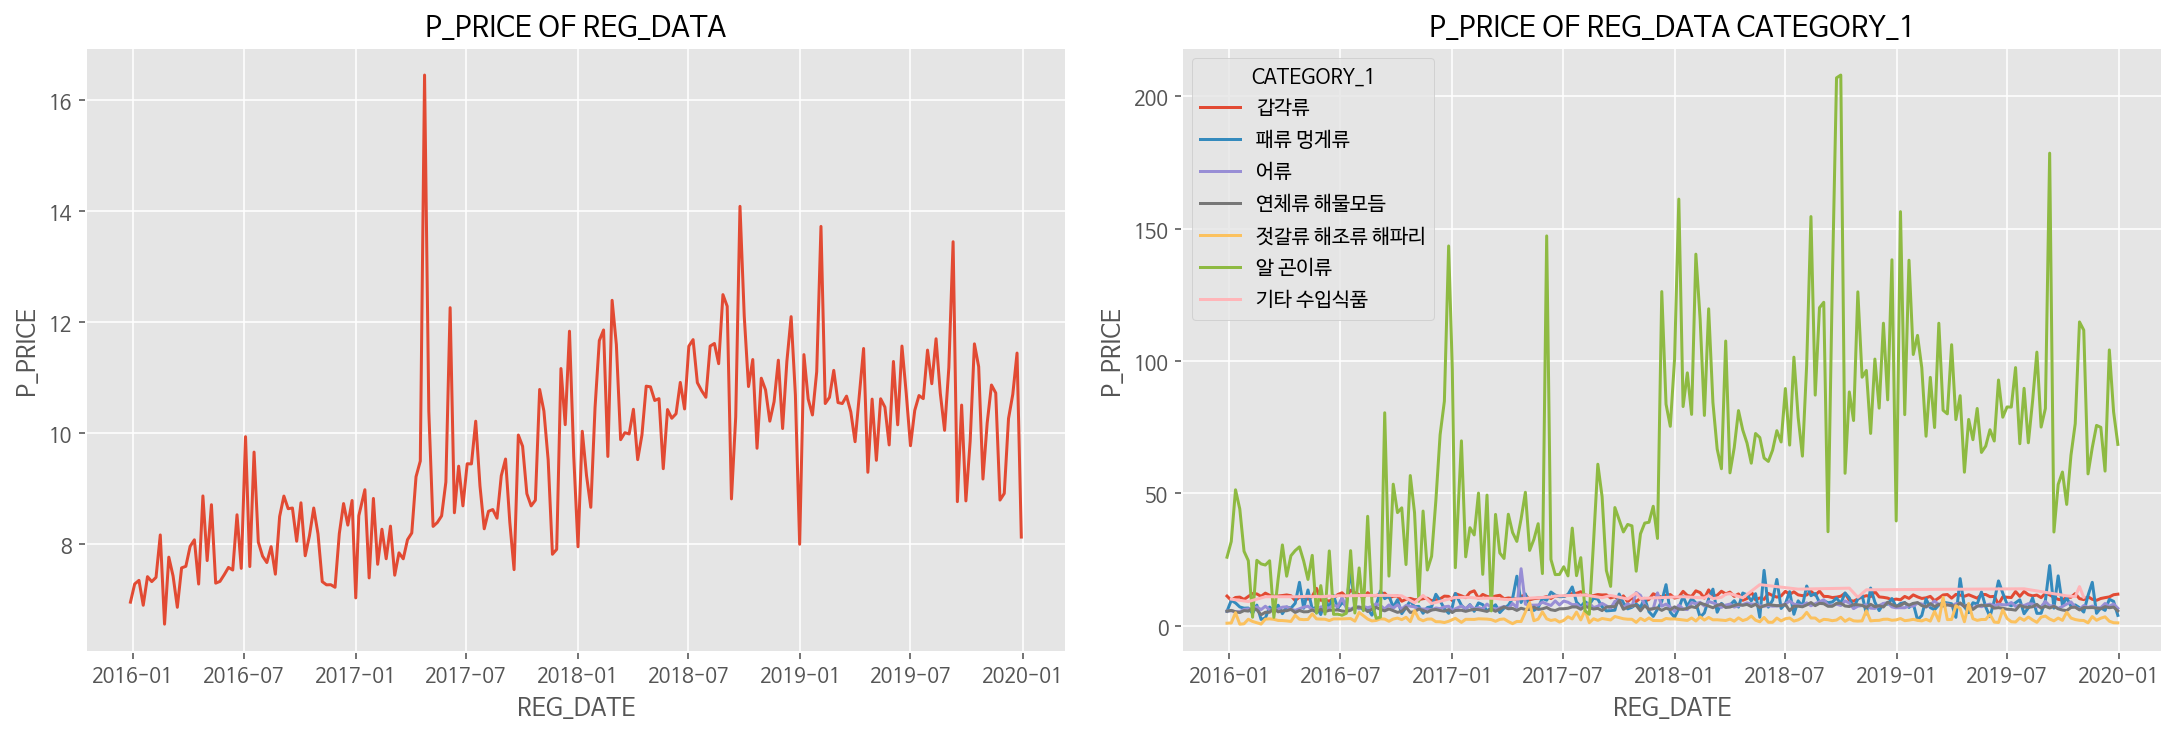

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(15,5), sharey=False,constrained_layout=True)
sns.lineplot(data = train_data, x='REG_DATE', y='P_PRICE',ci=None,ax=axes[0])
axes[0].set_title("P_PRICE OF REG_DATA")
sns.lineplot(data = train_data, x='REG_DATE', y='P_PRICE',hue='CATEGORY_1',ci=None,ax=axes[1])
axes[1].set_title("P_PRICE OF REG_DATA CATEGORY_1")

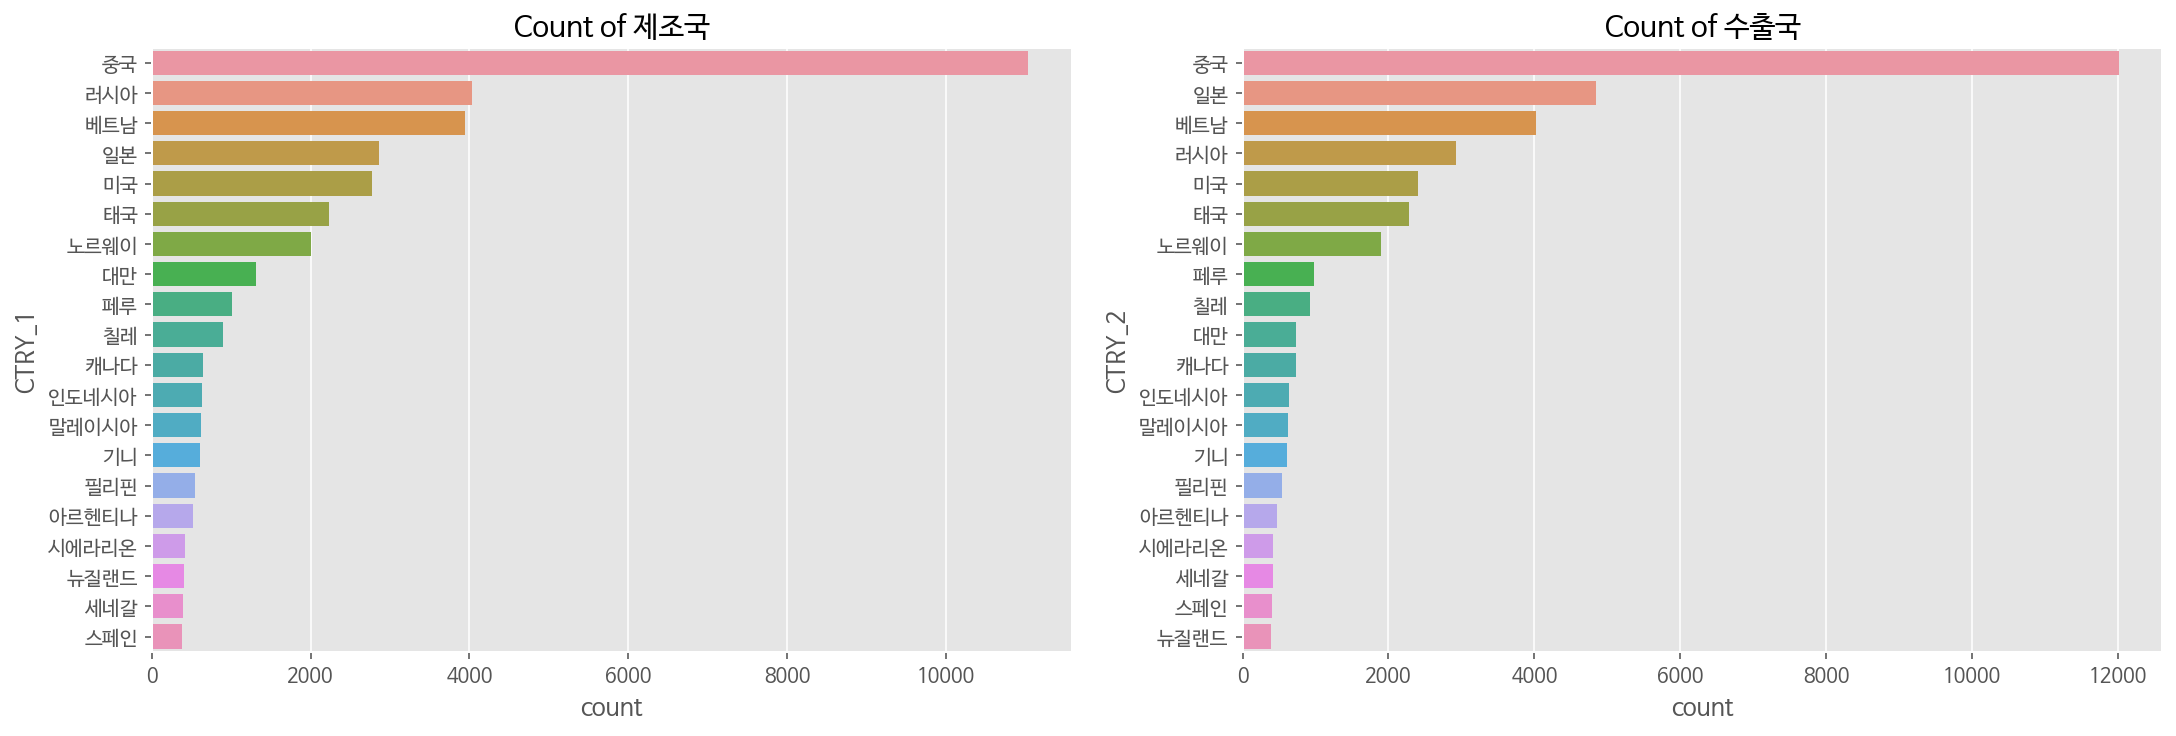

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(15,5), sharey=False,constrained_layout=True)
sns.countplot(data = train_data, y='CTRY_1',order = sortvalue.index[0:20],ax=axes[0])
axes[0].set_title("Count of 제조국")
sns.countplot(data = train_data, y='CTRY_2',order = sortvalue2.index[0:20],ax=axes[1])
axes[1].set_title("Count of 수출국")
plt.show()

In [27]:
CATEGORY_1=train_data['CATEGORY_1'].value_counts()
CATEGORY_1

어류             21339
갑각류             7298
연체류 해물모듬        6772
패류 멍게류          5097
알 곤이류           1037
젓갈류 해조류 해파리      467
기타 수입식품           63
Name: CATEGORY_1, dtype: int64

In [28]:
labels=CATEGORY_1.keys()
labels

Index(['어류', '갑각류', '연체류 해물모듬', '패류 멍게류', '알 곤이류', '젓갈류 해조류 해파리', '기타 수입식품'], dtype='object')

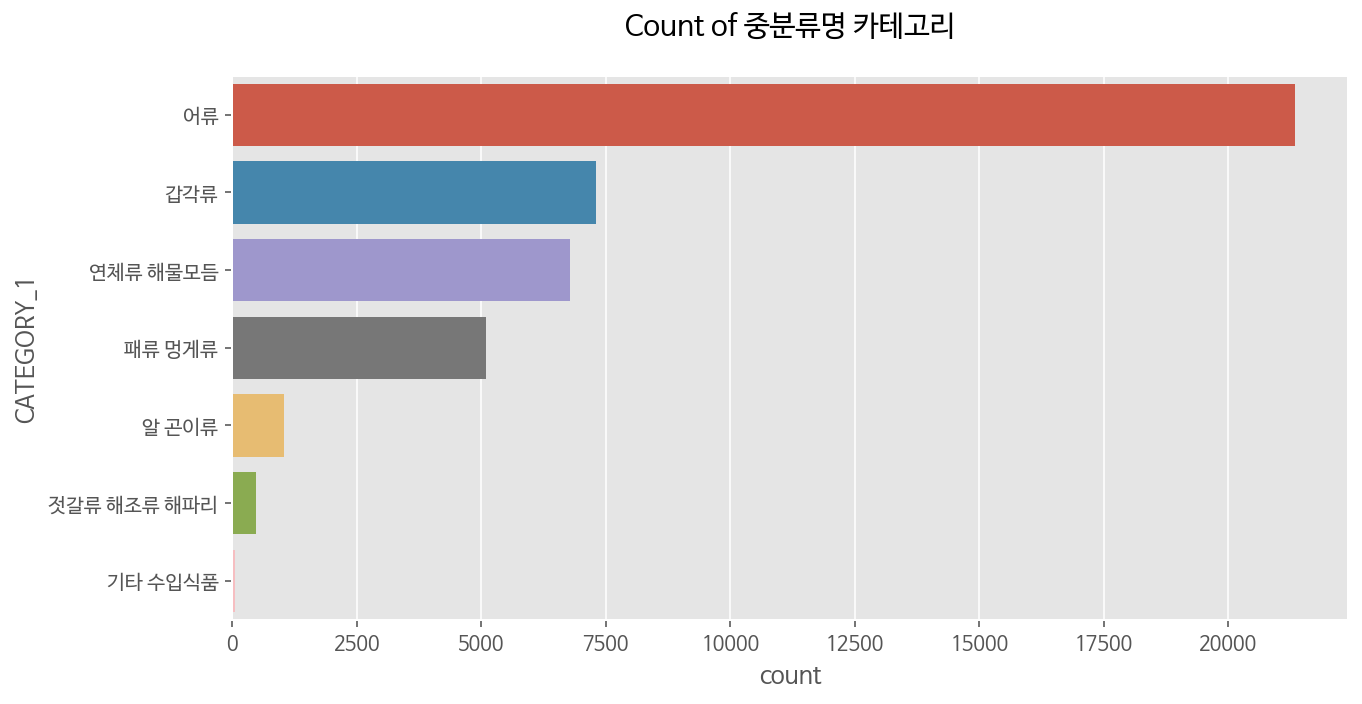

In [29]:
plt.figure(figsize=(10,5))
plt.title('Count of 중분류명 카테고리', pad= 20)
sns.countplot(data =train_data,y='CATEGORY_1',order = CATEGORY_1.index)
plt.show()

In [30]:
CATEGORY_2 = train_data['CATEGORY_2'].value_counts()
CATEGORY_2

새우           4141
참치 새치류       3159
오징어          2662
게            2477
연어           1905
             ... 
버터플라이 킹피쉬       1
다시마             1
김               1
물메기(곰치)         1
호끼류             1
Name: CATEGORY_2, Length: 113, dtype: int64

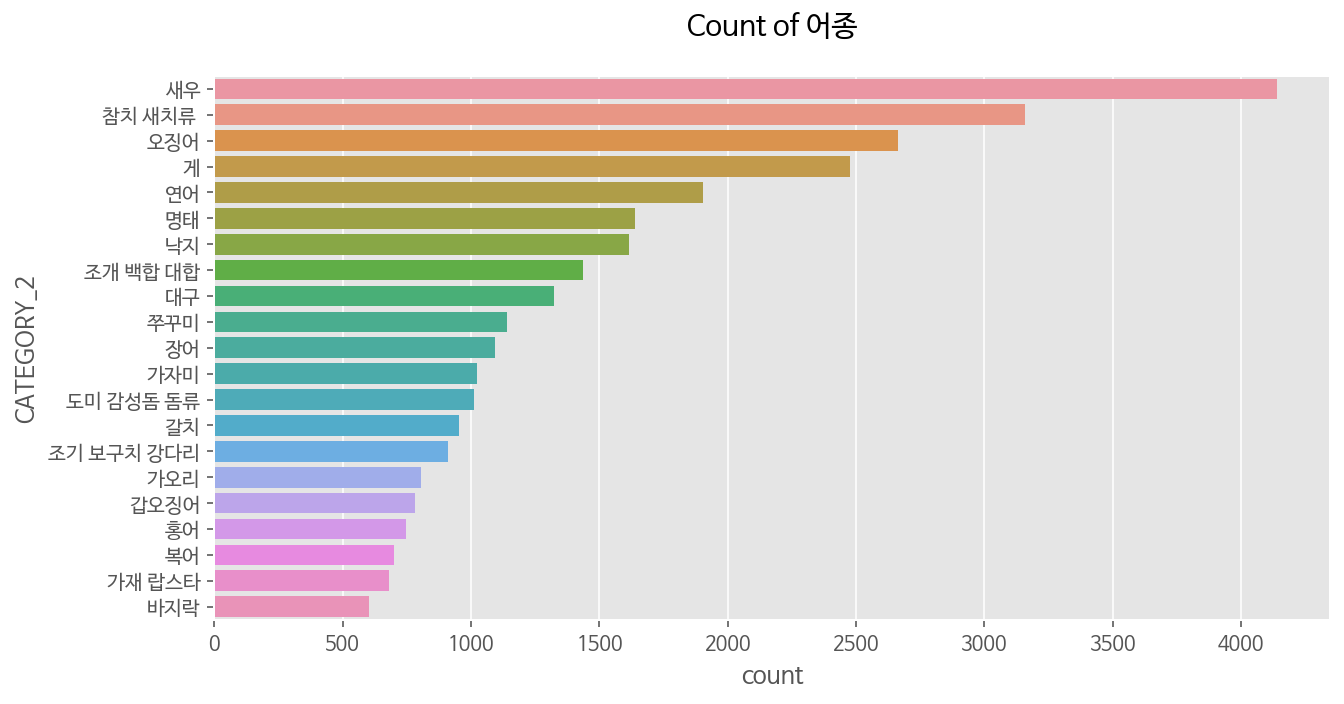

In [31]:
plt.figure(figsize=(10,5))
plt.title('Count of 어종', pad= 20)
sns.countplot(data =train_data,y='CATEGORY_2',order = CATEGORY_2.index[0:21])
plt.show()

In [32]:
P_IMPOT_TYRE = train_data['P_IMPORT_TYPE'].value_counts()
P_IMPOT_TYRE

냉동             13568
활               8280
냉장              4682
냉동,살,자숙         1431
냉동,살            1044
               ...  
냉동,눈살              2
냉동,자숙,절단,횟감        1
냉장,간               1
자숙,건조              1
건조,지느러미,자숙         1
Name: P_IMPORT_TYPE, Length: 78, dtype: int64

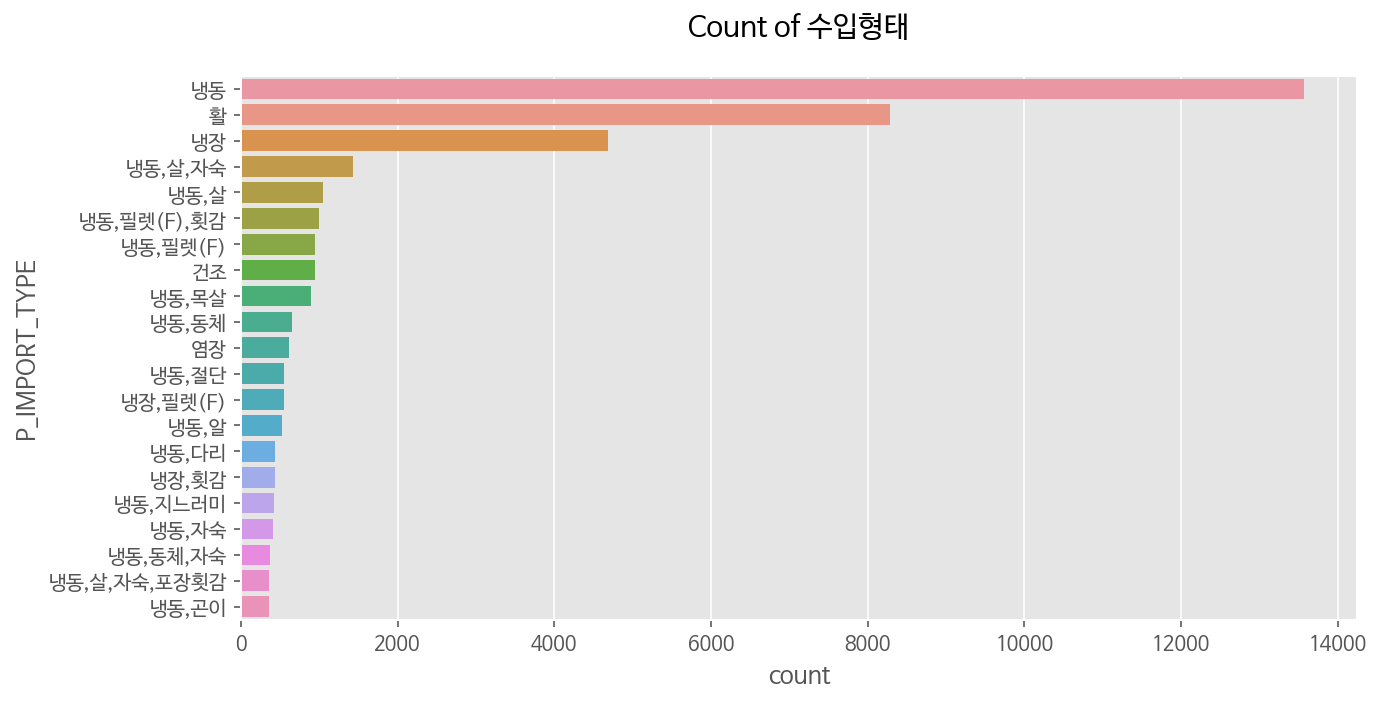

In [33]:
plt.figure(figsize=(10,5))
plt.title('Count of 수입형태', pad= 20)
sns.countplot(data =train_data,y='P_IMPORT_TYPE',order = P_IMPOT_TYRE.index[0:21])
plt.show()

In [34]:
train_data['P_IMPORT_TYPE'].unique()

array(['냉동', '냉동,절단', '건조,자숙', '냉동,살,자숙', '냉동,살', '냉장,살', '염장,살',
       '냉동,한쪽껍질붙은', '활', '냉장', '냉동,목살', '냉동,목살,횟감', '염장', '냉동,알',
       '냉동,필렛(F),횟감', '냉동,포장횟감,필렛(F)', '냉동,동체', '냉동,창난', '냉동,살,포장횟감',
       '냉동,자숙,포장횟감', '건조', '냉동,다리,포장횟감', '냉장,필렛(F)', '냉동,자숙,한쪽껍질붙은',
       '냉동,필렛(F)', '냉동,살,자숙,포장횟감', '냉장,횟감', '냉동,다리', '냉동,슬라이스(S),포장횟감',
       '냉장,포장횟감,필렛(F)', '냉동,동체,자숙', '냉동,지느러미', '냉장,필렛(F),횟감', '냉동,곤이',
       '냉동,머리', '자숙,건조', '냉동,슬라이스(S),자숙,포장횟감', '냉동,슬라이스(S)', '냉동,자숙',
       '냉동,자숙,절단', '냉동,간', '건조,알,캐비아대용', '냉동,볼살', '냉동,볼살,횟감', '냉동,개아지살,살',
       '냉동,내장', '냉동,턱살', '냉동,집게다리', '냉동,외투막,살', '냉동,다리,자숙', '냉동,지느러미,자숙',
       '냉동,머리살,횟감', '건조,필렛(F)', '절단,건조', '냉동,개아지살,살,포장횟감', '건조,살,자숙',
       '냉동,턱살,횟감', '냉동,알,캐비아대용', '냉동,살,슬라이스(S),포장횟감', '냉동,머리살',
       '냉동,자숙,절단,횟감', '염장,알,캐비아대용', '건조,훈제', '냉동,동체,포장횟감', '냉동,횟감',
       '냉동,개아지살,살,횟감', '냉장,개아지살,살', '냉동,슬라이스(S),자숙', '냉동,난포선',
       '냉동,동체,자숙,포장횟감', '냉동,머리_외화획득용', '냉장,간', '줄기,염장', '건조,껍질',
       '냉동,다리,자숙,포장횟감', '냉동,꼬리_외화획득용'

In [35]:
train_data['P_NAME'].unique()

array(['아르헨티나붉은새우', '꽃게', '해삼', '서대', '은밀복', '옥돔', '까치복', '흰다리새우', '바지락',
       '가리비', '개조개', '문어', '주꾸미', '멍게', '대서양참다랑어', '파타고니아이빨고기', '낙지',
       '눈다랑어', '가오리', '미역', '뱀장어', '참다랑어', '대서양연어', '대구', '명태알', '대게',
       '줄민태', '홍서대', '위고둥', '꽁치', '황새치', '틸라피아', '오징어', '기름치', '바다가재',
       '까지가자미', '홍어', '먹장어', '명태', '홍다리얼룩새우', '화살오징어', '청상아리', '붕어',
       '감성돔', '자주복', '꼬막', '재첩', '피조개', '피뿔고둥', '능성어', '준치', '참돔', '연어',
       '왕게', '장문볼락', '각시가자미', '가자미', '털게', '해파리', '새우', '민밀복', '젓새우',
       '홍합', '백합,MERCENARIA MERCENARIA', '새꼬리민태알', '붕장어', '갈치', '밴댕이',
       '갑오징어', '성게알', '동자개', '코토니', '병어', '이스라엘잉어', '영상가이석태', '스피노잠',
       '새꼬막', '농어', '아귀', '긴가이석태', '방어', '고등어', '흑밀복', '홍민어', '북방대합',
       '백합', '황돔', '미꾸라지', '가무락조개', '부세', '줄비늘치', '개불', '비단조개', '깜장북방대합',
       '참조기', '비너스백합', '민들조개', '주름백합', '아담스백합', '은연어', '민어', '옥두어', '민꽃게',
       '골뱅이', '민물새우', '게', '임연수어', '해물혼합', '식용자라', '흑기흉상어', 'PANGASIUS메기',
       '보리멸', '마소치가자미', '귀상어', '동죽', '남방참다랑어', '송어', '적새우', '잉어', '

In [36]:
train_data['P_NAME'].value_counts()

흰다리새우    2601
오징어      2150
명태       1640
낙지       1617
연어       1489
         ... 
황적퉁돔        1
적돔          1
붉돔          1
얼룩볼락        1
청대구         1
Name: P_NAME, Length: 286, dtype: int64

In [37]:
train_data['P_PURPOSE'].value_counts()

판매용         39278
자사제품제조용      1726
외화획득용 원료      911
합작            144
반송품(기타)        14
Name: P_PURPOSE, dtype: int64

In [38]:
P_NAME=train_data.groupby('P_NAME')['P_PRICE'].agg(**{'P_NAME mean price':'mean'}).reset_index()
PNAME_MEAN=P_NAME.sort_values(by=['P_NAME mean price'], axis=0,ascending=False)
PNAME_MEAN

,P_NAME,P_NAME mean price
238,청새리상어,229.380948
159,성게알,139.730706
33,금눈돔,105.159426
265,해삼,73.410829
150,상어,67.792968
...,...,...
206,장성베도라치,0.799846
103,물메기,0.650000
217,정어리,0.602548
165,스피노잠,0.515048


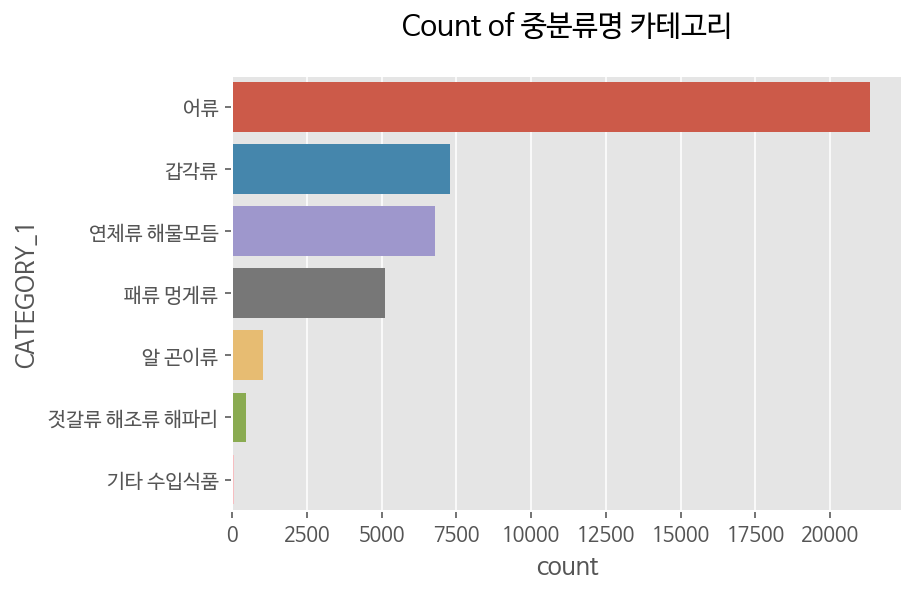

In [39]:
plt.title('Count of 중분류명 카테고리', pad= 20)
sns.countplot(data =train_data,y='CATEGORY_1',order = CATEGORY_1.index)
plt.show()

In [40]:
train_data['IMPORT_1']=""
for i in train_data.index:
    if "," in train_data['P_IMPORT_TYPE'][i]:
        train_data['IMPORT_1'][i]=train_data['P_IMPORT_TYPE'][i].split(",")[0]
    else:
        train_data['IMPORT_1'][i]=train_data['P_IMPORT_TYPE'][i]
    i=i+1

train_data['IMPORT_1'].unique()

array(['냉동', '건조', '냉장', '염장', '활', '자숙', '절단', '줄기'], dtype=object)

In [41]:
salmon = train_data[train_data['CATEGORY_2'] == "연어"] 
salmon = salmon.sort_values(by=['P_PRICE'], axis=0 ,ascending =False)
P_IMPORT_TYRE_salmon = salmon['P_IMPORT_TYPE'].value_counts()
IMPORT_TYRE_salmon = salmon['IMPORT_1'].value_counts()
salmon

,REG_DATE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE,IMPORT_1
14240,2017-05-15,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",62.457202,냉장
15859,2017-07-10,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",52.263797,냉장
14834,2017-06-05,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",51.394008,냉장
15663,2017-07-03,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",50.173407,냉장
14444,2017-05-22,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",49.777500,냉장
...,...,...,...,...,...,...,...,...,...,...
41075,2019-12-02,러시아,러시아,외화획득용 원료,어류,연어,곱사연어,냉동,2.000000,냉동
32701,2019-02-11,러시아,러시아,외화획득용 원료,어류,연어,연어,냉동,1.900000,냉동
35188,2019-05-06,러시아,러시아,외화획득용 원료,어류,연어,연어,냉동,1.866149,냉동
30224,2018-11-19,러시아,러시아,외화획득용 원료,어류,연어,곱사연어,냉동,1.850974,냉동


In [42]:
 squid = train_data[train_data['CATEGORY_2'] == "오징어"] 
 squid
 P_IMPORT_TYRE_squid = squid['P_IMPORT_TYPE'].value_counts()
 IMPORT_TYRE_squid = squid['IMPORT_1'].value_counts()

In [43]:
shrimp = train_data[train_data['CATEGORY_2'] == "새우"]
shrimp= shrimp[shrimp['P_NAME']== "흰다리새우"]
shrimp
P_IMPORT_TYRE_shrimp = shrimp['P_IMPORT_TYPE'].value_counts()
IMPORT_TYRE_shrimp = shrimp['IMPORT_1'].value_counts()

In [44]:
shrimp['P_IMPORT_TYPE'].value_counts()

냉동              745
냉동,살            615
냉동,살,자숙,포장횟감    361
냉동,살,자숙         358
냉동,살,포장횟감       190
냉장              172
냉동,자숙           160
Name: P_IMPORT_TYPE, dtype: int64

In [45]:
target_data=pd.concat([salmon,squid,shrimp])
target_data

,REG_DATE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE,IMPORT_1
14240,2017-05-15,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",62.457202,냉장
15859,2017-07-10,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",52.263797,냉장
14834,2017-06-05,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",51.394008,냉장
15663,2017-07-03,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",50.173407,냉장
14444,2017-05-22,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",49.777500,냉장
...,...,...,...,...,...,...,...,...,...,...
41976,2019-12-30,말레이시아,말레이시아,판매용,갑각류,새우,흰다리새우,냉동,7.682474,냉동
41980,2019-12-30,태국,태국,판매용,갑각류,새우,흰다리새우,냉장,11.500000,냉장
42005,2019-12-30,에콰도르,에콰도르,판매용,갑각류,새우,흰다리새우,냉동,6.739527,냉동
42023,2019-12-30,베트남,베트남,판매용,갑각류,새우,흰다리새우,"냉동,살,자숙",7.701577,냉동


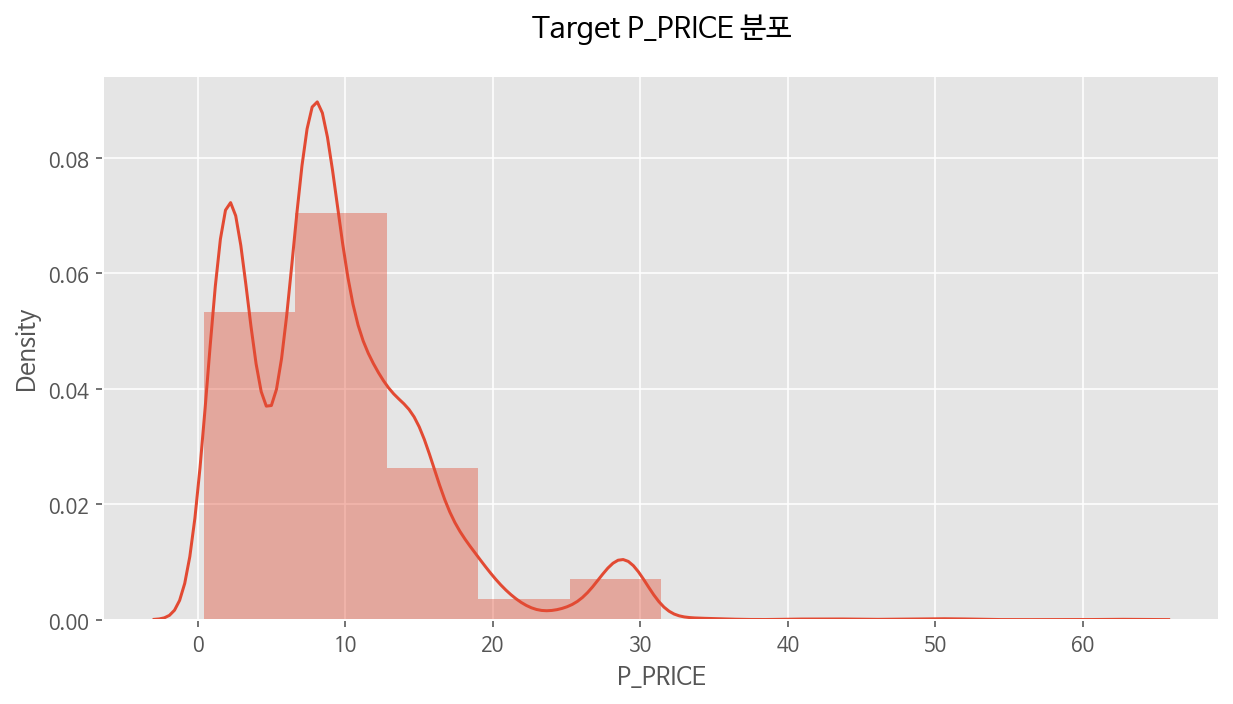

In [46]:
plt.figure(figsize=(10,5))
plt.title("Target P_PRICE 분포", pad= 20)
sns.distplot(target_data['P_PRICE'],bins=10)

연어 오징어 그리고 새우만 남은 데이터는 총 7168개

In [64]:
different_data=target_data[target_data['CTRY_1'] != target_data['CTRY_2'] ]

In [48]:
target_data.shape

(7168, 10)

In [66]:
different_data.shape

(159, 10)

제조국과 수출국이 다른 데이터는 target data 에서 159개 159개 데이터를 분석에서 우선 제외 

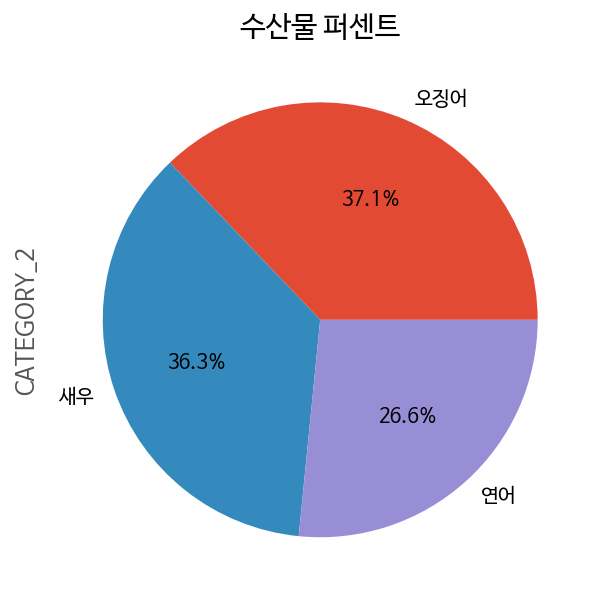

In [49]:
plt.figure(figsize=(5,5))
plt.title("수산물 퍼센트")
target_data['CATEGORY_2'].value_counts().plot.pie(autopct="%.1f%%")
plt.show()

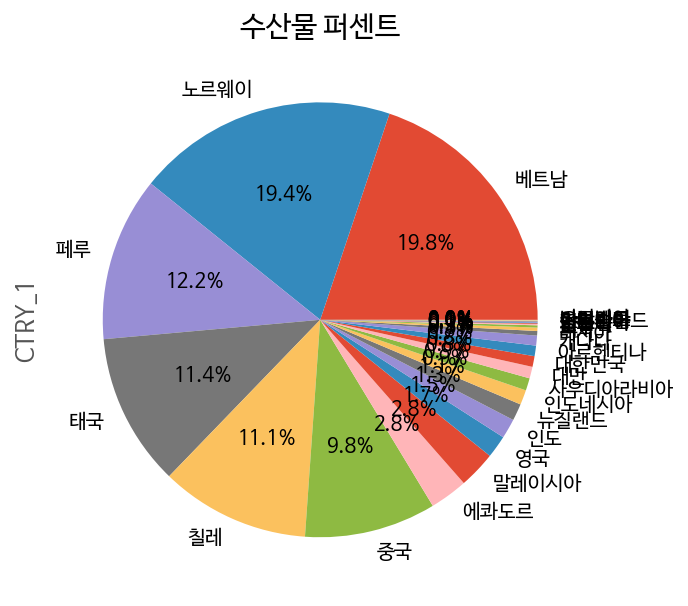

In [72]:
plt.figure(figsize=(5,5))
plt.title("수산물 퍼센트")
target_data['CTRY_1'].value_counts().plot.pie(autopct="%.1f%%")
plt.show()

오징어가 37.1 % 새우가 36.3 % 연어 26.6 % 로 확인 가능

In [50]:
sa=salmon['CTRY_1'].value_counts()
sq=squid['CTRY_1'].value_counts()
sh=shrimp['CTRY_1'].value_counts()

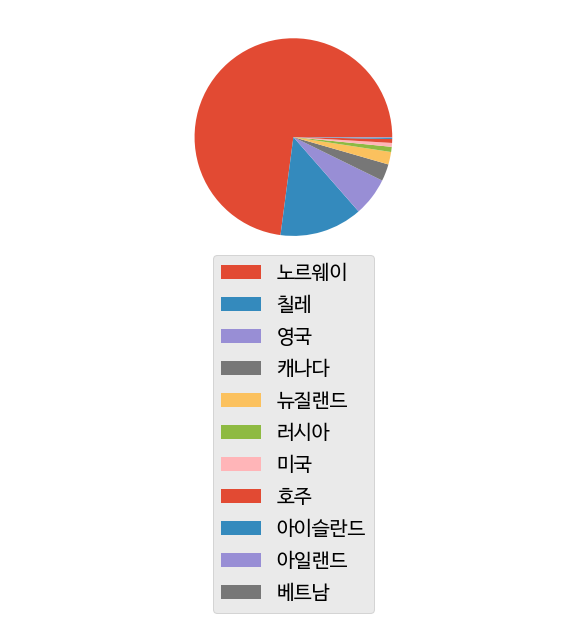

In [82]:
fig = plt.figure(11, figsize=(5,5))
ax =fig.add_subplot(2,1,1)
ax.axis("equal")
labels=sa.index

pie = ax.pie(sa,startangle=0)
ax2=fig.add_subplot(2,1,2)
ax2.axis("off") 
ax2.legend(pie[0],labels, loc="center")
plt.show()

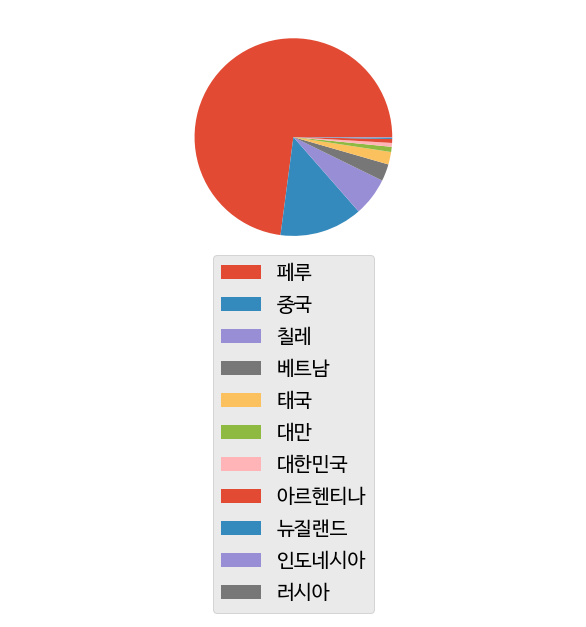

In [73]:
fig = plt.figure(11, figsize=(5,5))
ax =fig.add_subplot(2,1,1)
ax.axis("equal")
labels=sq.index

pie = ax.pie(sa,startangle=0)
ax2=fig.add_subplot(2,1,2)
ax2.axis("off") 
ax2.legend(pie[0],labels, loc="center")

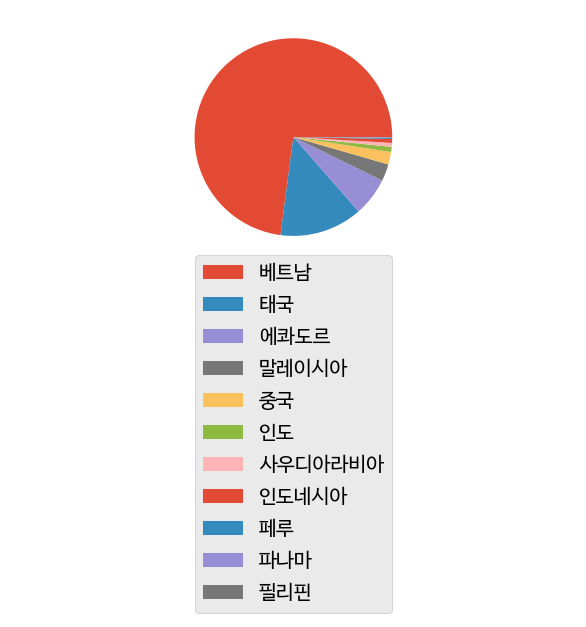

In [83]:
fig = plt.figure(11, figsize=(5,5))
ax =fig.add_subplot(2,1,1)
ax.axis("equal")
labels=sh.index

pie = ax.pie(sa,startangle=0)
ax2=fig.add_subplot(2,1,2)
ax2.axis("off") 
ax2.legend(pie[0],labels, loc="center")

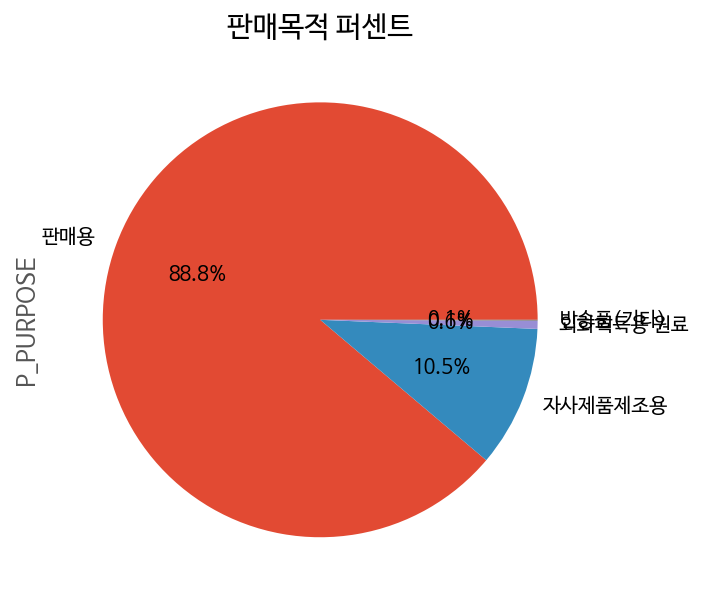

In [52]:
plt.figure(figsize=(5,5))
plt.title("판매목적 퍼센트")
target_data['P_PURPOSE'].value_counts().plot.pie(autopct="%.1f%%")
plt.show()

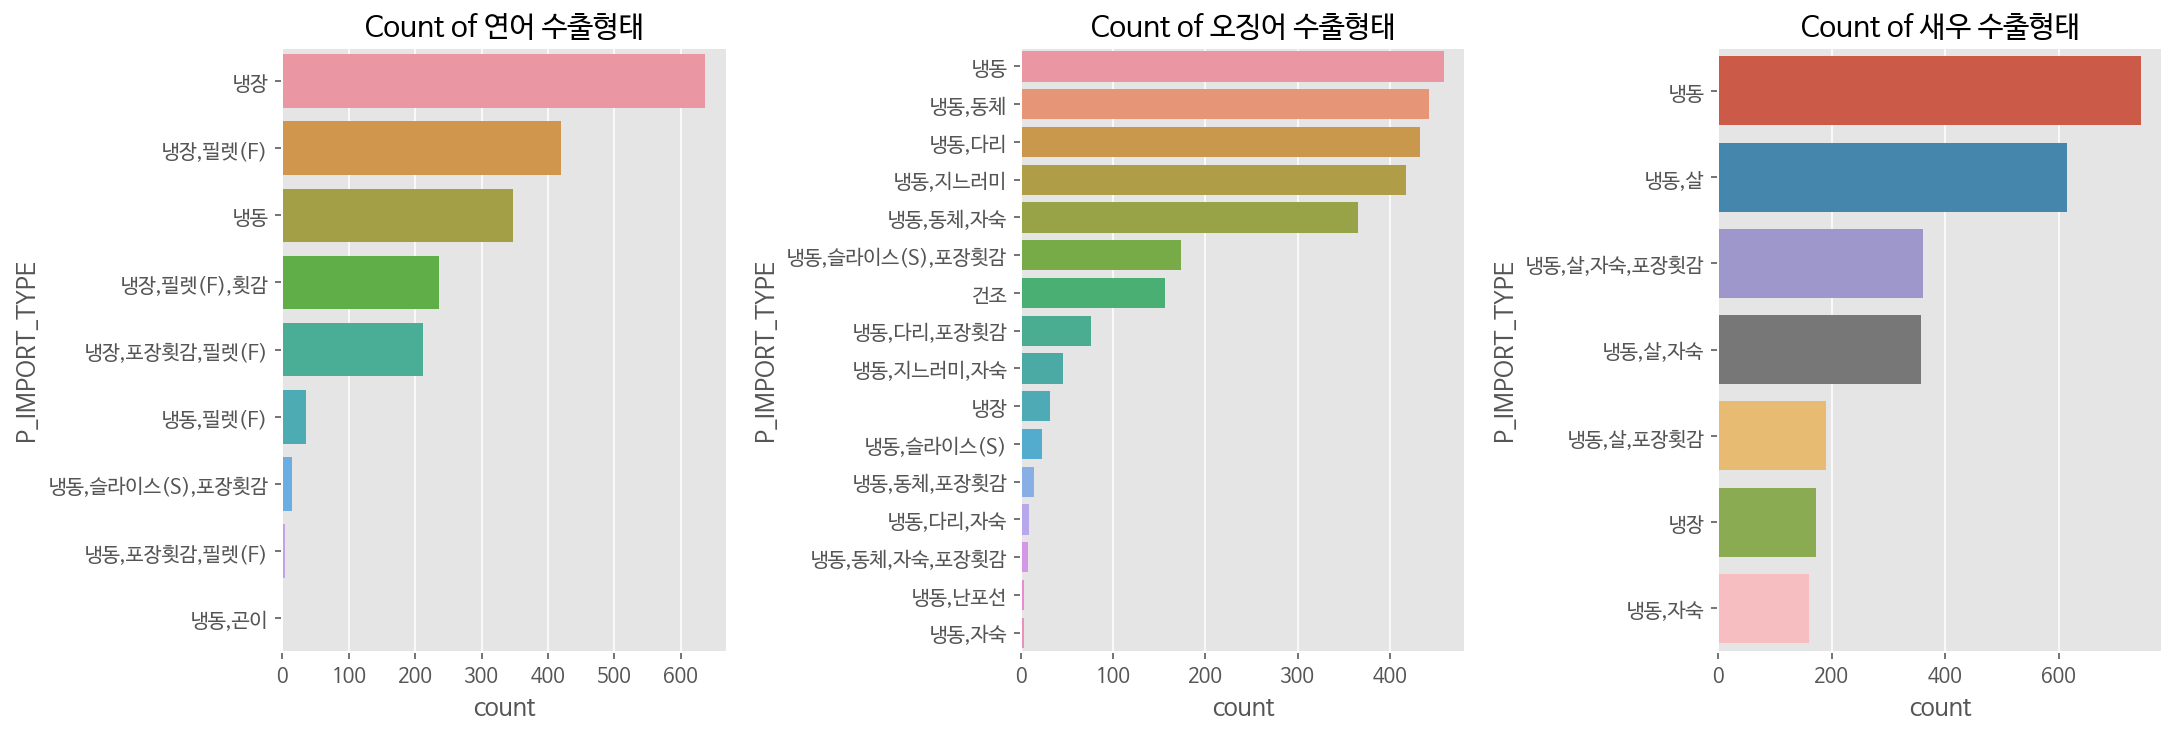

In [53]:
fig, axes = plt.subplots(1, 3, figsize=(15,5), sharey=False,constrained_layout=True)
sns.countplot(data=salmon,y='P_IMPORT_TYPE',order=P_IMPORT_TYRE_salmon.index,ax=axes[0])
axes[0].set_title("Count of 연어 수출형태")
sns.countplot(data=squid,y='P_IMPORT_TYPE',order=P_IMPORT_TYRE_squid.index,ax=axes[1])
axes[1].set_title("Count of 오징어 수출형태")
sns.countplot(data=shrimp,y='P_IMPORT_TYPE',order=P_IMPORT_TYRE_shrimp.index,ax=axes[2])
axes[2].set_title("Count of 새우 수출형태")
plt.show()

연어의경우 냉장으로 가장 많이 수출이 되며  오징어와 새우는 냉동 수출이 많음

In [54]:
SALMON_MEAN = salmon.groupby('P_IMPORT_TYPE')['P_PRICE'].agg(**{'P_IMPORT_TYPE mean price':'mean'}).reset_index()
SALMON_MEAN=SALMON_MEAN.sort_values(by=['P_IMPORT_TYPE mean price'], axis=0,ascending=False)
SQUID_MEAN = squid.groupby('P_IMPORT_TYPE')['P_PRICE'].agg(**{'P_IMPORT_TYPE mean price':'mean'}).reset_index()
SQUID_MEAN=SQUID_MEAN.sort_values(by=['P_IMPORT_TYPE mean price'], axis=0,ascending=False)
SHRIMP_MEAN = shrimp.groupby('P_IMPORT_TYPE')['P_PRICE'].agg(**{'P_IMPORT_TYPE mean price':'mean'}).reset_index()
SHRIMP_MEAN=SHRIMP_MEAN.sort_values(by=['P_IMPORT_TYPE mean price'], axis=0,ascending=False)

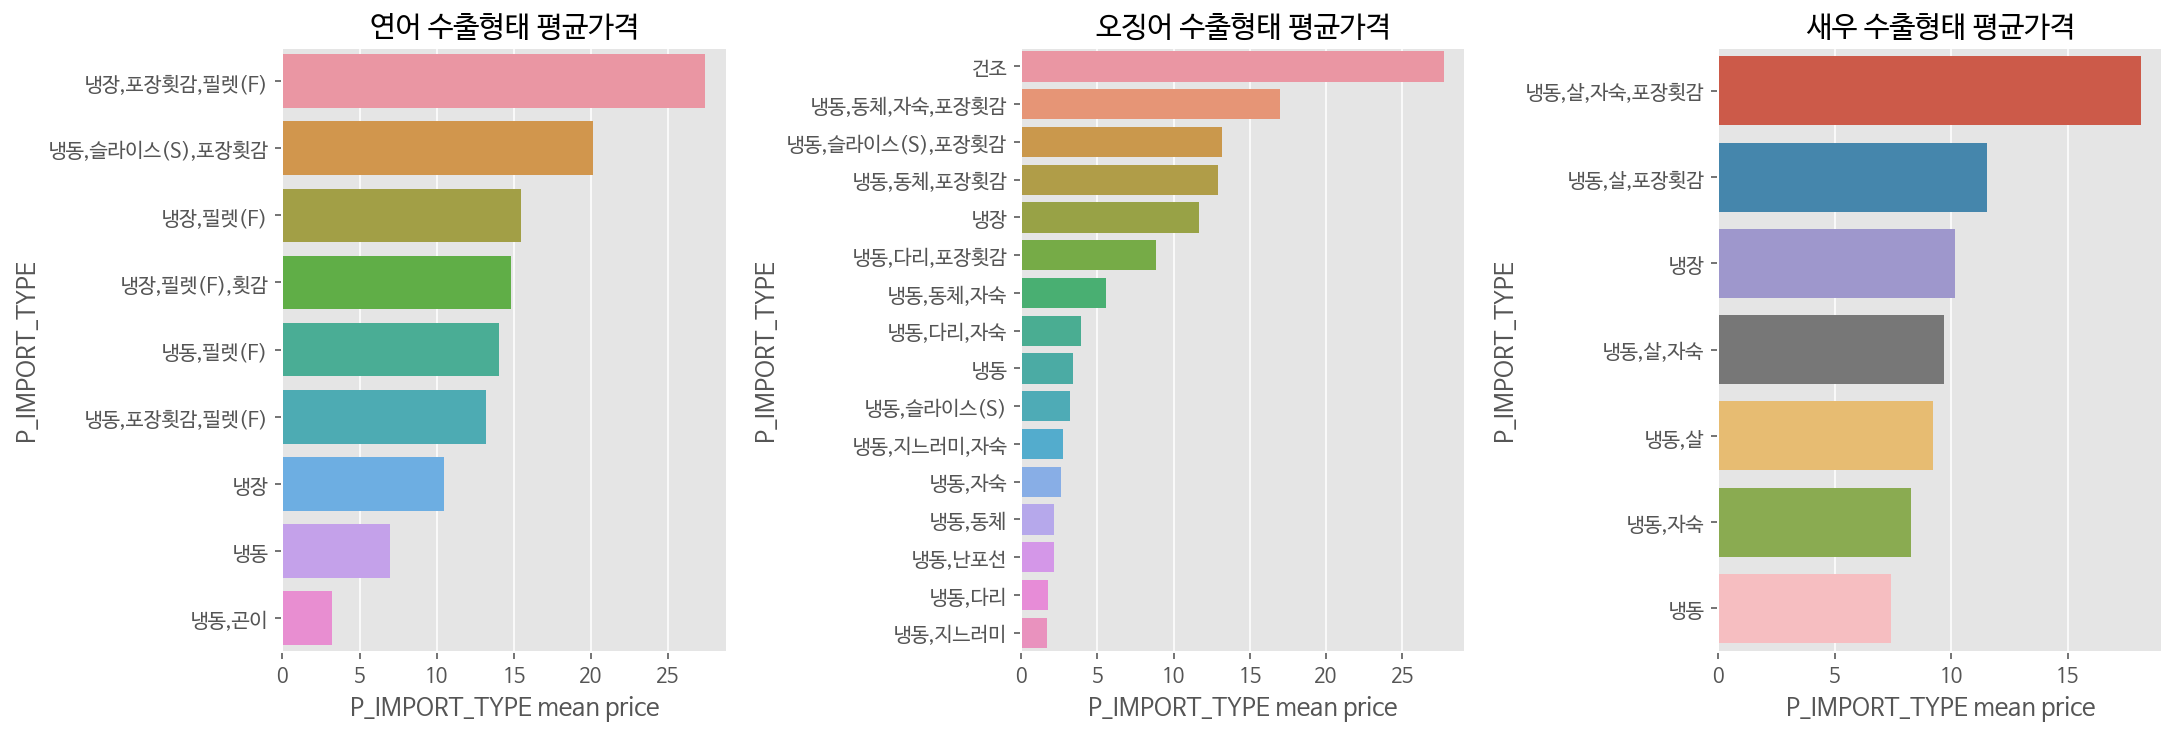

In [55]:
fig, axes = plt.subplots(1, 3, figsize=(15,5), sharey=False,constrained_layout=True)
sns.barplot(data = SALMON_MEAN, y='P_IMPORT_TYPE', x='P_IMPORT_TYPE mean price',ax=axes[0])
axes[0].set_title("연어 수출형태 평균가격")
sns.barplot(data = SQUID_MEAN, y='P_IMPORT_TYPE', x='P_IMPORT_TYPE mean price',ax=axes[1])
axes[1].set_title("오징어 수출형태 평균가격")
sns.barplot(data = SHRIMP_MEAN, y='P_IMPORT_TYPE', x='P_IMPORT_TYPE mean price',ax=axes[2])
axes[2].set_title("새우 수출형태 평균가격")
plt.show()

In [56]:
SALMON_MEAN1 = salmon.groupby('IMPORT_1')['P_PRICE'].agg(**{'IMPORT_1 mean price':'mean'}).reset_index()
SALMON_MEAN1=SALMON_MEAN1.sort_values(by=['IMPORT_1 mean price'], axis=0,ascending=False)
SQUID_MEAN1 = squid.groupby('IMPORT_1')['P_PRICE'].agg(**{'IMPORT_1 mean price':'mean'}).reset_index()
SQUID_MEAN1=SQUID_MEAN1.sort_values(by=['IMPORT_1 mean price'], axis=0,ascending=False)
SHRIMP_MEAN1 = shrimp.groupby('IMPORT_1')['P_PRICE'].agg(**{'IMPORT_1 mean price':'mean'}).reset_index()
SHRIMP_MEAN1=SHRIMP_MEAN1.sort_values(by=['IMPORT_1 mean price'], axis=0,ascending=False)

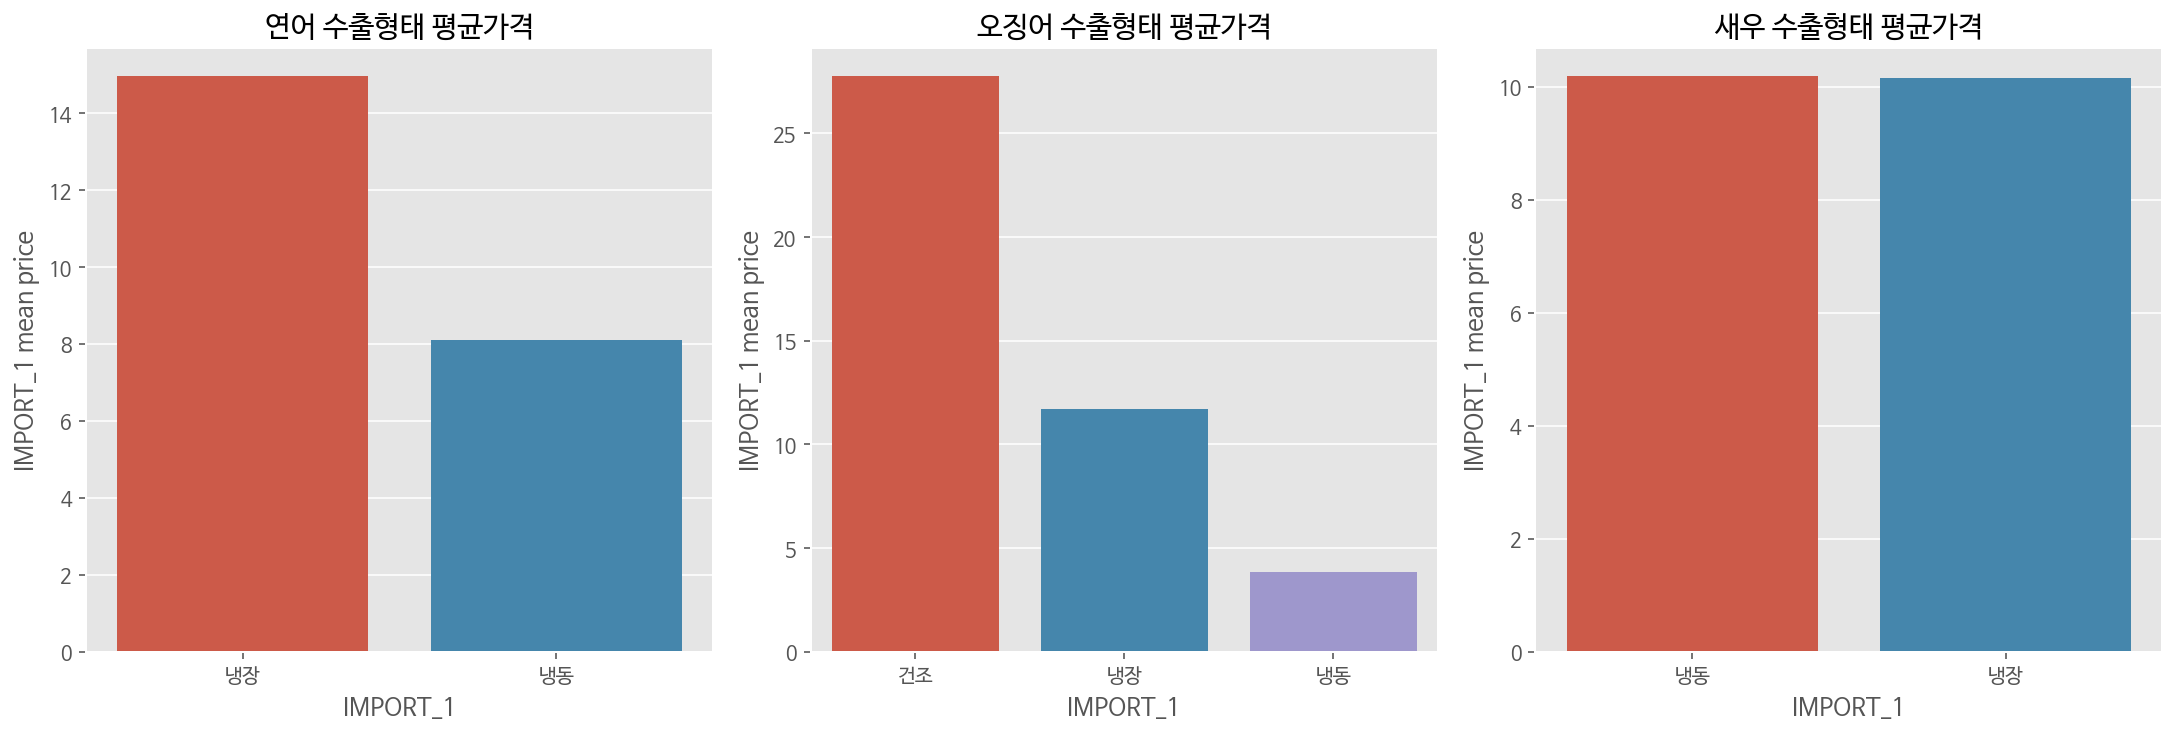

In [57]:
fig, axes = plt.subplots(1, 3, figsize=(15,5), sharey=False,constrained_layout=True)
sns.barplot(data = SALMON_MEAN1, x='IMPORT_1', y='IMPORT_1 mean price',ax=axes[0])
axes[0].set_title("연어 수출형태 평균가격")
sns.barplot(data = SQUID_MEAN1, x='IMPORT_1', y='IMPORT_1 mean price',ax=axes[1])
axes[1].set_title("오징어 수출형태 평균가격")
sns.barplot(data = SHRIMP_MEAN1, x='IMPORT_1', y='IMPORT_1 mean price',ax=axes[2])
axes[2].set_title("새우 수출형태 평균가격")
plt.show()

연어의경우 냉장 포장횟감 필렛 그리고 

No handles with labels found to put in legend.


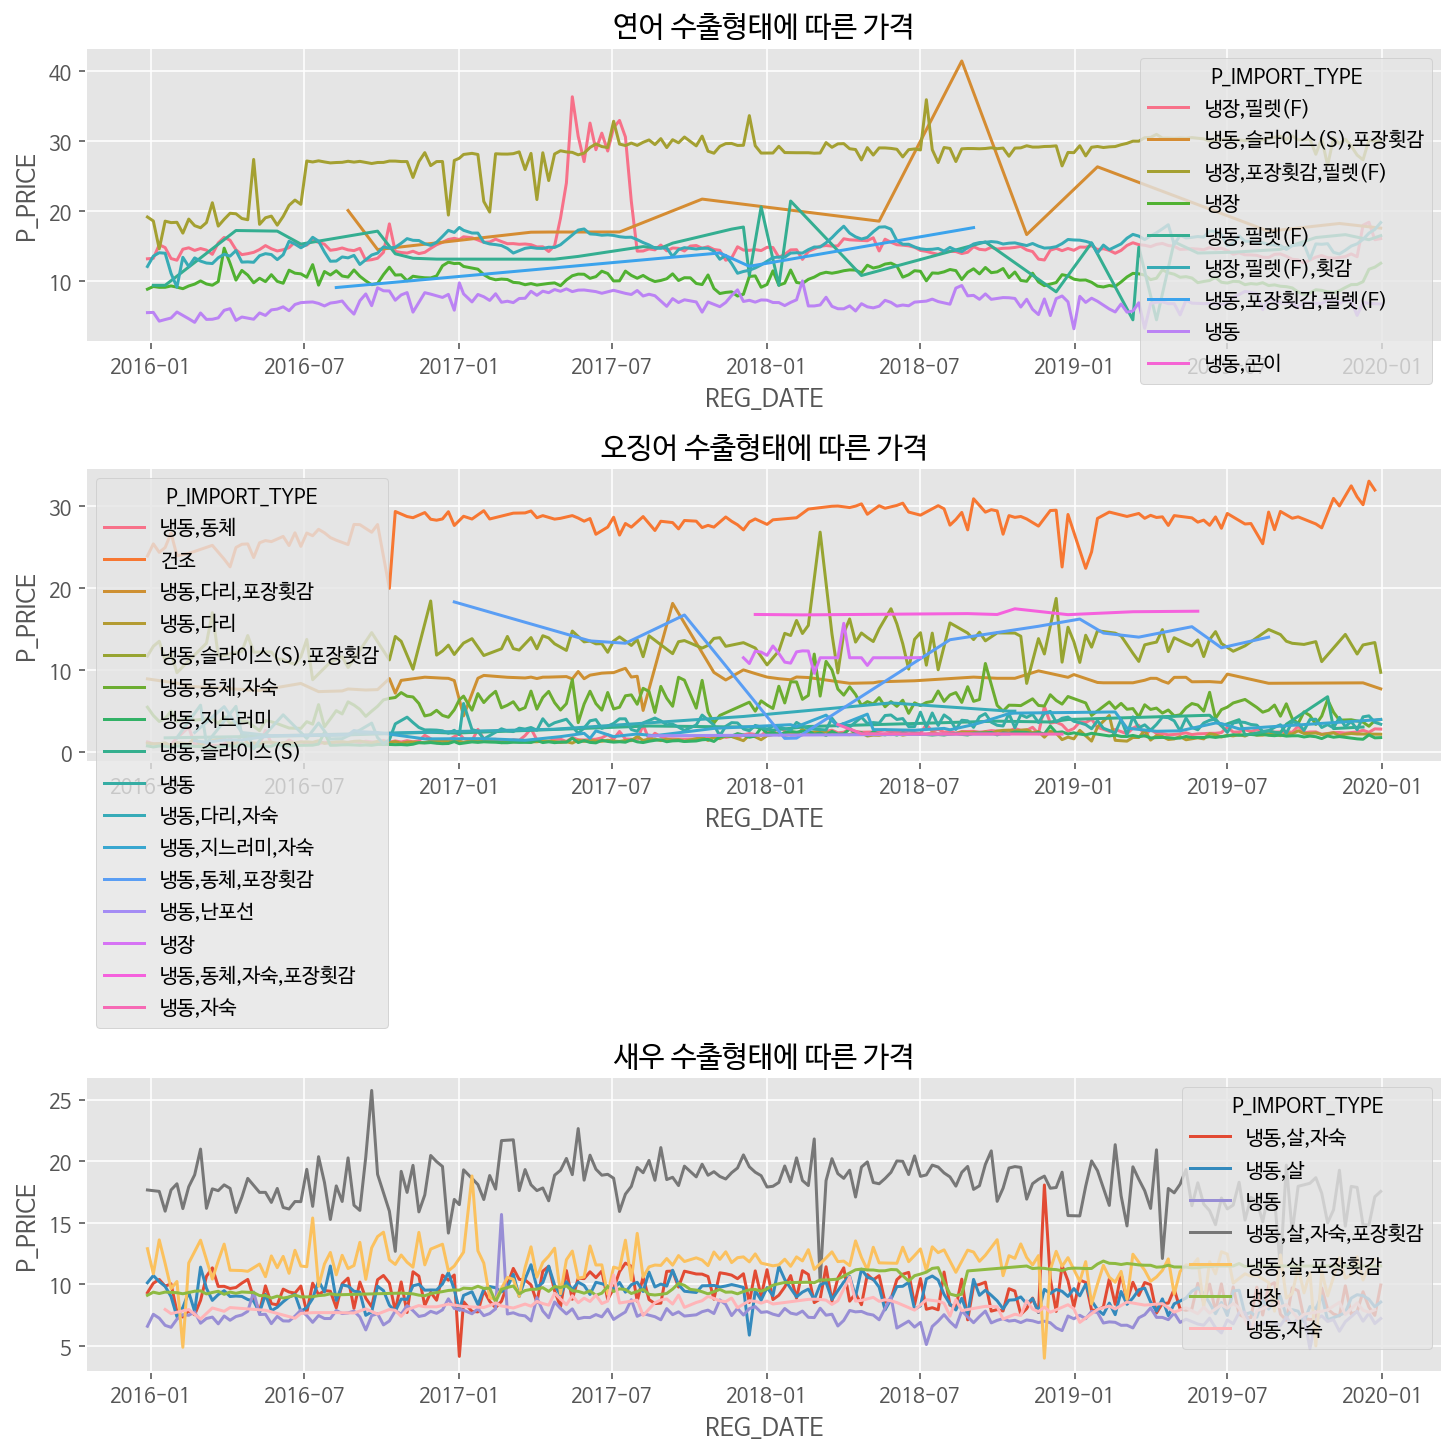

In [58]:
fig, axes = plt.subplots(3, 1, figsize=(10,10), sharey=False,constrained_layout=True)
plt.legend(loc='center left', bbox_to_anchor=(10.5, 10.5))
sns.lineplot(data = salmon, x='REG_DATE', y='P_PRICE',hue='P_IMPORT_TYPE',ci=None,ax=axes[0])
sns.lineplot(data = squid, x='REG_DATE', y='P_PRICE',hue='P_IMPORT_TYPE',ci=None,ax=axes[1])
sns.lineplot(data = shrimp, x='REG_DATE', y='P_PRICE',hue='P_IMPORT_TYPE',ci=None,ax=axes[2])
axes[0].set_title("연어 수출형태에 따른 가격")
axes[1].set_title("오징어 수출형태에 따른 가격")
axes[2].set_title("새우 수출형태에 따른 가격")
plt.show()

No handles with labels found to put in legend.


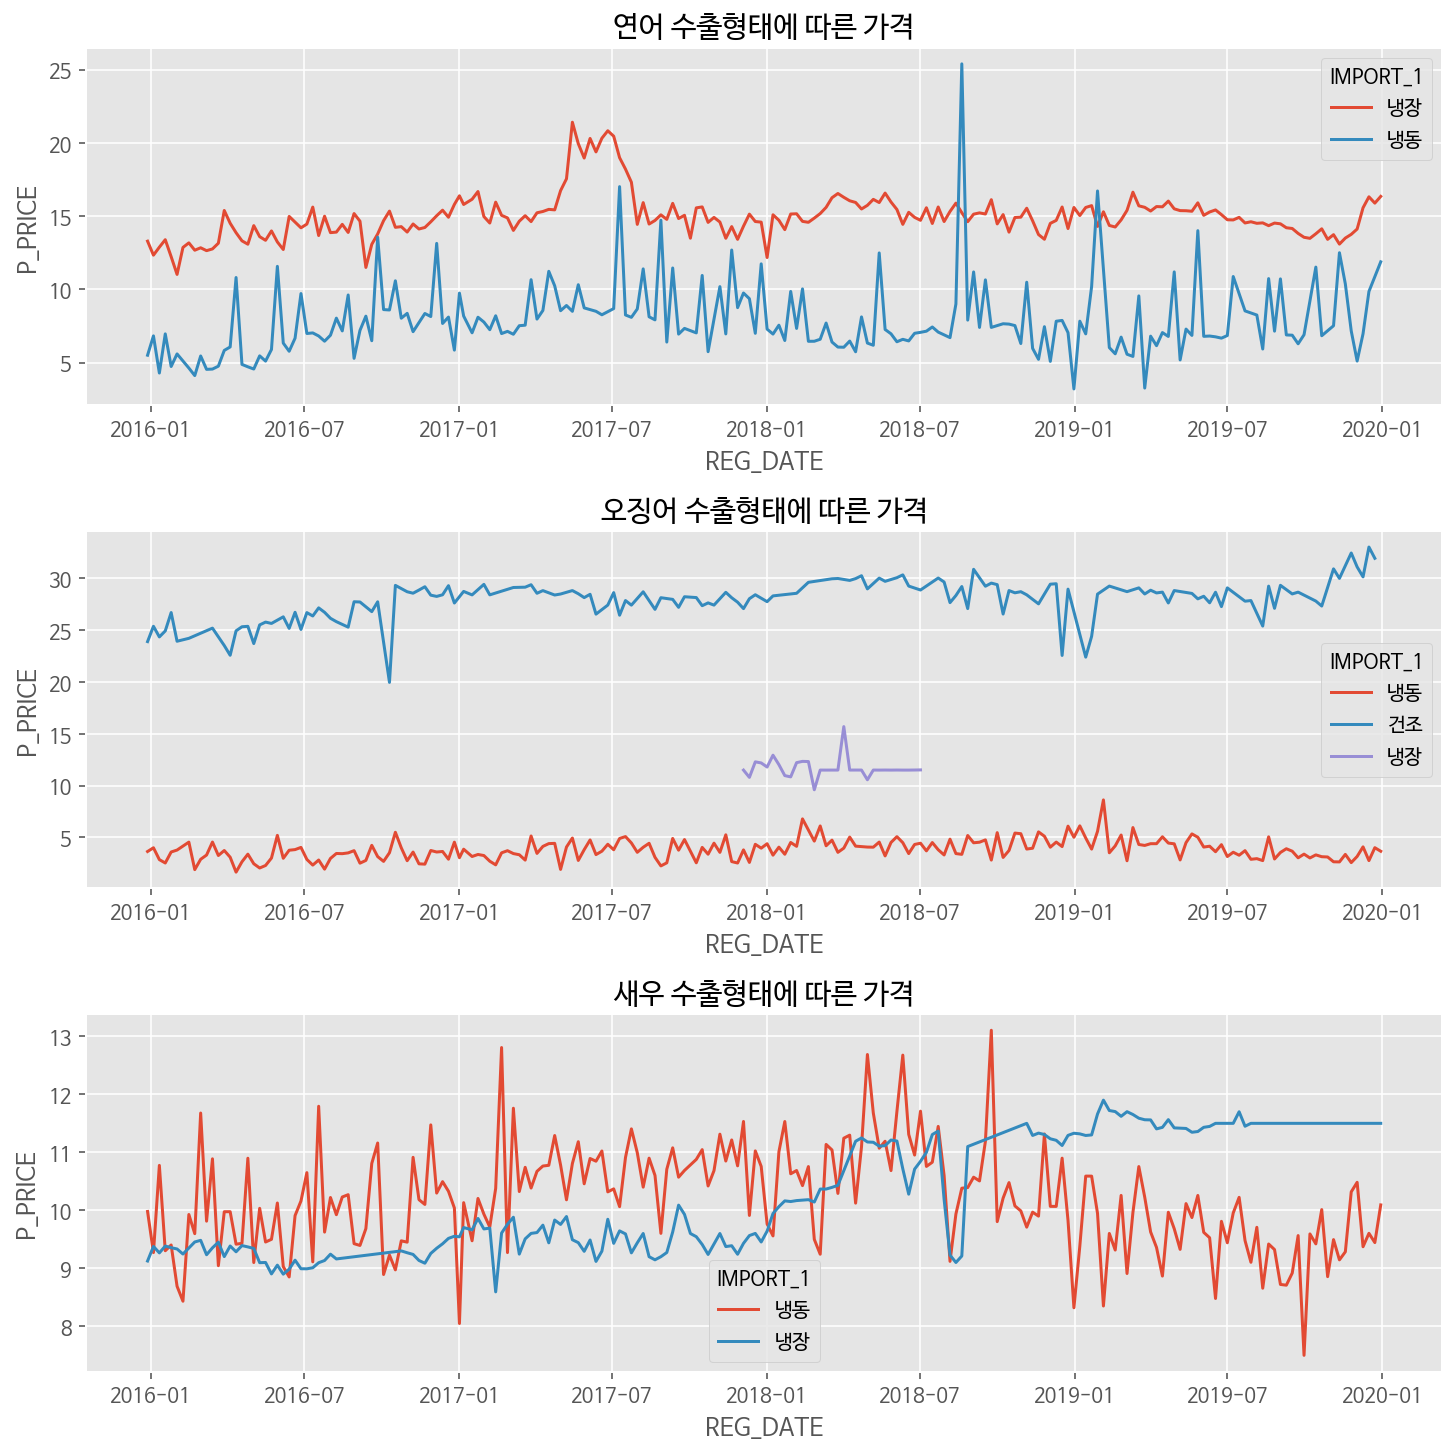

In [59]:
fig, axes = plt.subplots(3, 1, figsize=(10,10), sharey=False,constrained_layout=True)
plt.legend(loc='center left', bbox_to_anchor=(10.5, 10.5))
sns.lineplot(data = salmon, x='REG_DATE', y='P_PRICE',hue='IMPORT_1',ci=None,ax=axes[0])
sns.lineplot(data = squid, x='REG_DATE', y='P_PRICE',hue='IMPORT_1',ci=None,ax=axes[1])
sns.lineplot(data = shrimp, x='REG_DATE', y='P_PRICE',hue='IMPORT_1',ci=None,ax=axes[2])
axes[0].set_title("연어 수출형태에 따른 가격")
axes[1].set_title("오징어 수출형태에 따른 가격")
axes[2].set_title("새우 수출형태에 따른 가격")
plt.show()

No handles with labels found to put in legend.


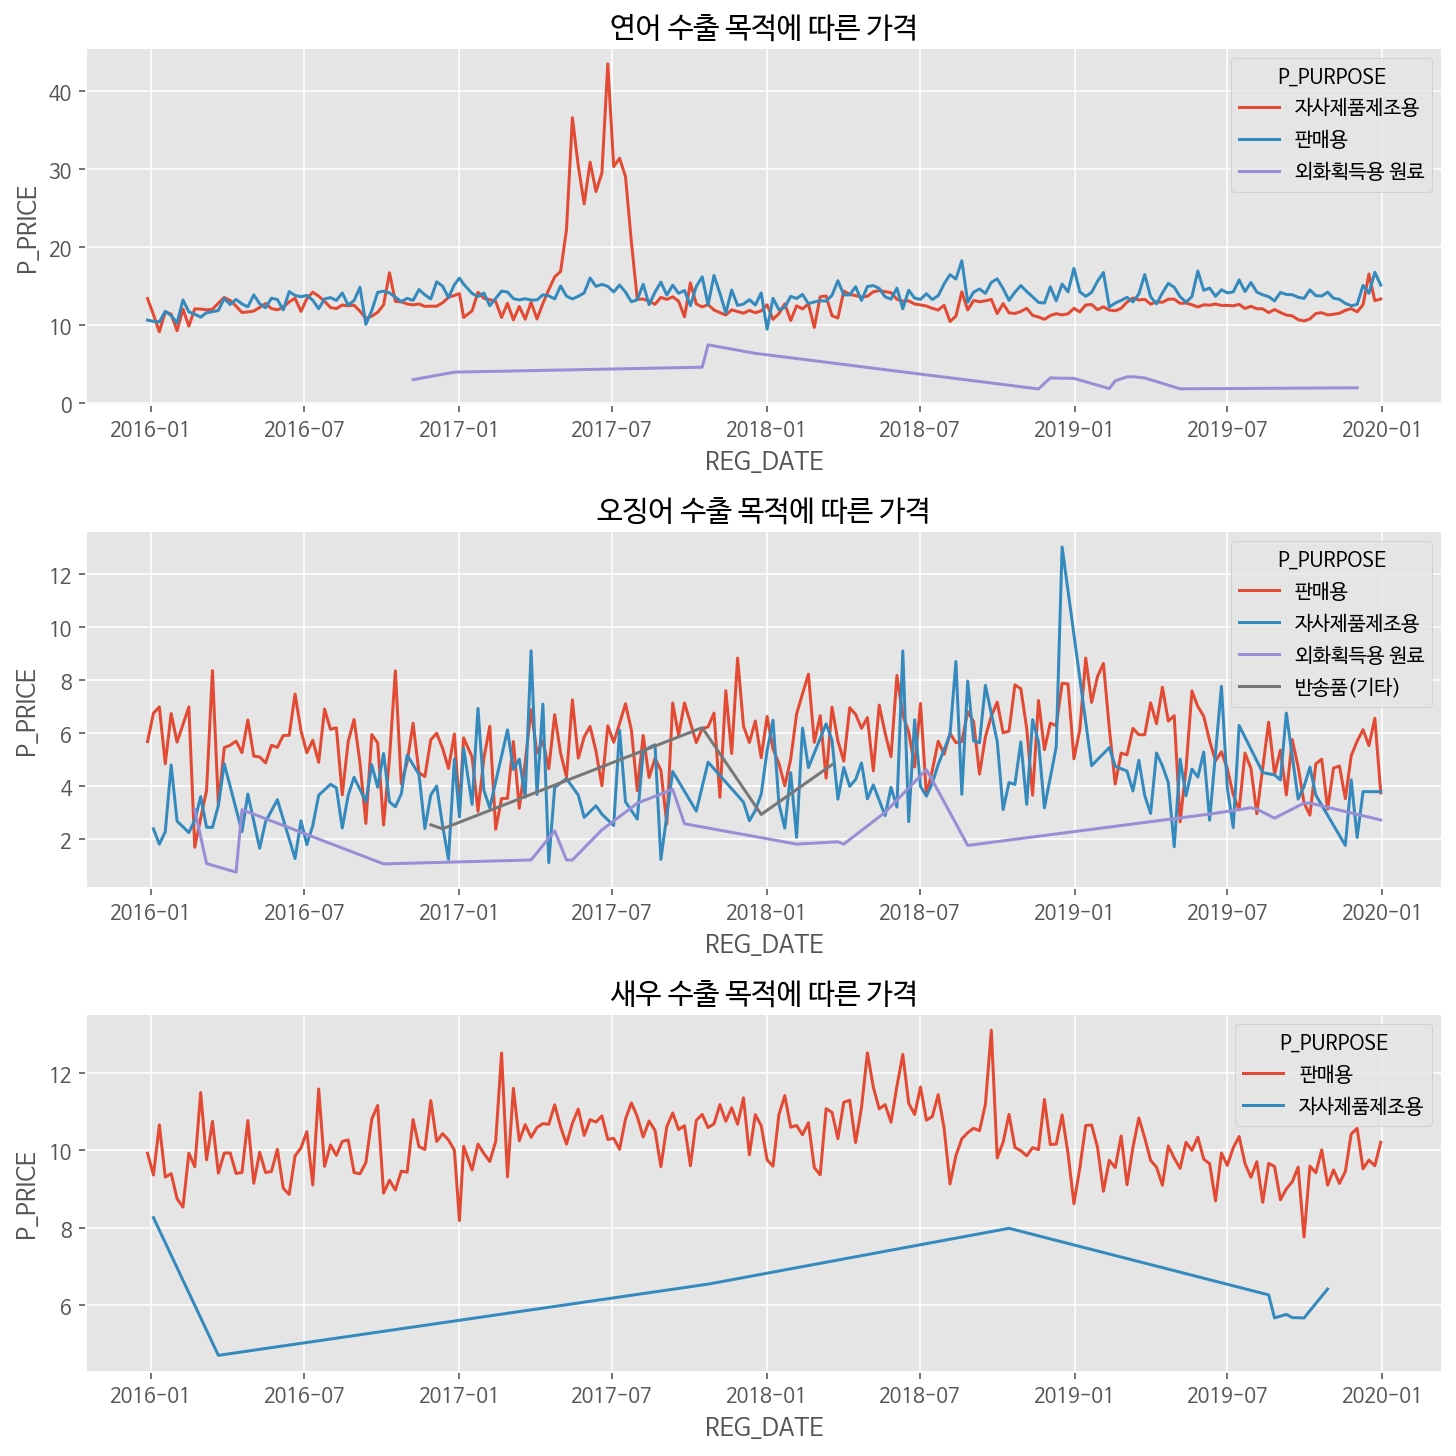

In [63]:
fig, axes = plt.subplots(3, 1, figsize=(10,10), sharey=False,constrained_layout=True)
plt.legend(loc='center left', bbox_to_anchor=(10.5, 10.5))
sns.lineplot(data = salmon, x='REG_DATE', y='P_PRICE',hue='P_PURPOSE',ci=None,ax=axes[0])
sns.lineplot(data = squid, x='REG_DATE', y='P_PRICE',hue='P_PURPOSE',ci=None,ax=axes[1])
sns.lineplot(data = shrimp, x='REG_DATE', y='P_PRICE',hue='P_PURPOSE',ci=None,ax=axes[2])
axes[0].set_title("연어 수출 목적에 따른 가격")
axes[1].set_title("오징어 수출 목적에 따른 가격")
axes[2].set_title("새우 수출 목적에 따른 가격")
plt.show()

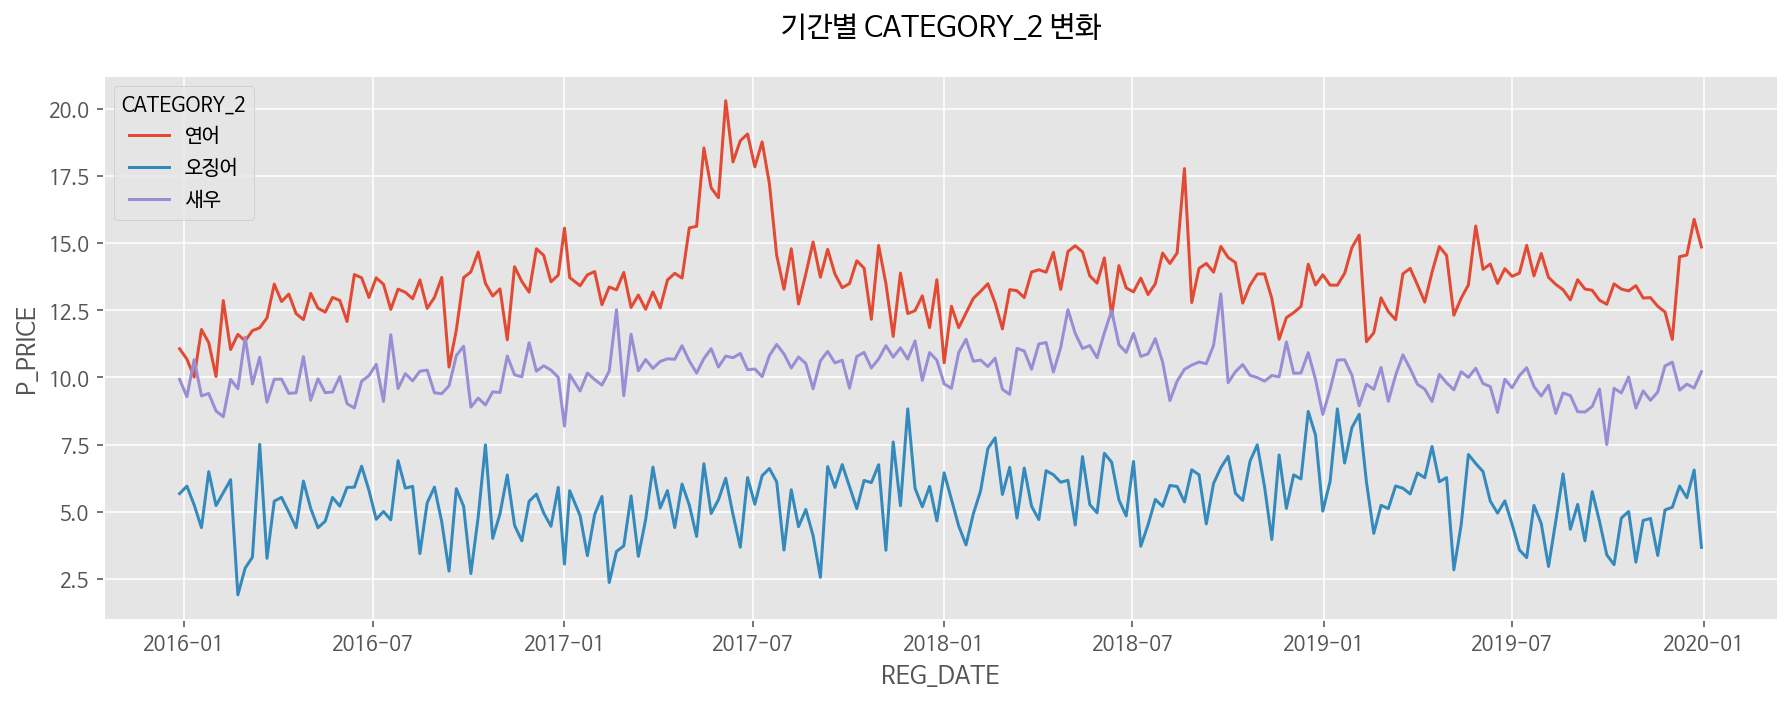

In [60]:
plt.figure(figsize=(15,5))
plt.title("기간별 CATEGORY_2 변화", pad= 20)
sns.lineplot(data = target_data, x='REG_DATE', y='P_PRICE',hue='CATEGORY_2',ci=None)
plt.show()

In [61]:
target_data.groupby(['CATEGORY_2','P_IMPORT_TYPE']).mean()

P_PRICE
CATEGORY_2 P_IMPORT_TYPE             
새우         냉동                7.404033
           냉동,살              9.211613
           냉동,살,자숙           9.704063
           냉동,살,자숙,포장횟감     18.162140
           냉동,살,포장횟감        11.547418
           냉동,자숙             8.283375
           냉장               10.160890
연어         냉동                6.954063
           냉동,곤이             3.200000
           냉동,슬라이스(S),포장횟감  20.113950
           냉동,포장횟감,필렛(F)    13.210870
           냉동,필렛(F)         14.070562
           냉장               10.492866
           냉장,포장횟감,필렛(F)    27.431585
           냉장,필렛(F)         15.497150
           냉장,필렛(F),횟감      14.822066
오징어        건조               27.742208
           냉동                3.408606
           냉동,난포선            2.133333
           냉동,다리             1.753472
           냉동,다리,자숙          3.943801
           냉동,다리,포장횟감        8.872937
           냉동,동체             2.163368
           냉동,동체,자숙          5.589666
           냉동,동체,자숙,포장횟감    16.954868
           냉동,동체,포장횟감       12.929357
           냉동,슬라이스(S)        3.186364
           냉동,슬라이스(S),포장횟감  13.162404
           냉동,자숙             2.607825
           냉동,지느러미           1.674173
           냉동,지느러미,자숙        2.772274
           냉장               11.682862

In [62]:
target_data.groupby(['CATEGORY_2','IMPORT_1']).mean()

P_PRICE
CATEGORY_2 IMPORT_1           
새우         냉동        10.181591
           냉장        10.160890
연어         냉동         8.087701
           냉장        14.946031
오징어        건조        27.742208
           냉동         3.862456
           냉장        11.682862

# 4. 이상값 색출

분명 특정값에서 이상값이 존재할거같은데 어떤 column 에서 존재할지 미지수..다 그려봐야하나..? 우선 냉동은 냉동 냉장은 냉장 활은 활끼리 분류 가능할듯

